# **Asignatura**: Aprendizaje Automático

**Práctica 1**: Aprendizaje supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 28 de Marzo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Pablo Martín Palomino</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Problema de clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar sistemas olfativos de Inteligencia Artificial mediante **narices electrónicas (*e-Nose*)**, capaces de determinar la calidad de una muestra de carne en base a los gases emitidos por la misma. El conjunto de datos se obteniene a partir de la investigación realizada en el siguiente artículo:

- Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222 (URL: <a href="https://www.mdpi.com/1424-8220/23/4/2222">https://www.mdpi.com/1424-8220/23/4/2222</a>)



## Contexto y motivación del problema

Los controles de calidad alimentarios son un conjunto de procedimientos y normativas que se implementan para asegurar que los alimentos sean seguros, saludables y cumplan con los estándares establecidos. Esto incluye la supervisión de la producción, el procesamiento, el almacenamiento y la distribución de los alimentos.

Los controles de calidad pueden abarcar desde la inspección de las materias primas hasta la evaluación del producto final, asegurando que no haya contaminantes y que se mantengan las propiedades nutricionales. Normalmente, el proceso de control de calidad conlleva la toma de muestras de alimentos, su transporte a un laboratorio, la realización de diferentes análisis químicos sobre el alimento y la generación de informes positivos o negativos.

Como alternativa a este proceso, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **sistemas olfativos electrónicos (*e-Noses*)** sensibles a los gases que pueden generar diferentes alimentos frescos o en descomposición. En particular, **nos crentraremos en la clasificación de la calidad de cortes de carne** haciendo uso de diferentes gases generados durante el proceso de descomposición de la misma.

Una **e-Nose** (*nariz electrónica*) es un dispositivo diseñado para detectar y analizar olores de manera similar a como lo hace el sentido del olfato en los seres humanos. Utilizan sensores químicos que pueden identificar diferentes compuestos volátiles en el aire (gases).

Estos dispositivos son muy útiles en diversas aplicaciones, como en la industria alimentaria para controlar la calidad de los productos, en la detección de contaminantes en el medio ambiente, o incluso en la medicina para identificar enfermedades a través del análisis de olores específicos.

La tecnología detrás de las narices electrónicas puede variar. En general, combinan sensores, algoritmos de procesamiento de datos y aprendizaje automático para interpretar los olores y proporcionar información útil.

<center>
<img src="https://cdn.open-pr.com/V/5/V505414311_g.jpg" />
</center>

## El conjunto de datos

El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS">https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS</a>.


Se trata de un conjunto de datos que contiene 12 tipos de cortes de carne diferentes (redondo, solomillo superior, filete de lomo, carne de aleta, lomo corto, falda, terrón, carne de falta, interior/exterior, costillas, espinilla y grasa). Los cortes fueron monitorizados durante 37h hasta su deterioro utilizando 11 tipos de sensores de gas distintos. En cada medición, se asignó una categoría del estado de la carne con 4 etiquetas indicando la calidad "excelente", "buena", "aceptable" y "estropeada".


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores. El modelo de decisión para determinar el estado de la carne a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar ha sido preprocesado y extraído a partir de los datos originales, y tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de medición de cada tipo de sensor de gas (en total 11 tipos distintos).
- **Datos de salida (Y)**: Clasificación del tipo de carne.


El conjunto de datos a usar en la práctica se encuentra accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [ ]:
import pandas as pd

path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

df= pd.read_csv(path_to_data_classification)
df.head(5)

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

#Problema 1

##Análisis descriptivo del problema,Análisis exploratorio de los datos nuestra disposición y Preprocesado de datos

Una introducción al problema sería:

La carne es una de las principales fuentes de proteína y grasa y debe ser consumida en poco tiempo y almacenada en condiciones frías y estériles para evitar su deterioro. Su calidad depende del tipo de animal del que proviene y afecta su valor nutricional y económico. Dado que la carne es propensa al crecimiento microbiano, es crucial realizar controles de calidad desde la producción hasta el consumo. Sin embargo, no siempre hay especialistas disponibles para llevar a cabo estos controles, por lo que se desarrollan sistemas automáticos, como las narices electrónicas (e-noses), que detectan gases emitidos por la descomposición de los alimentos.


Este estudio se enfoca en clasificar la calidad de los diferentes cortes de carne de res. Para los datos en este estudio se utilizan mediciones de e-nose de 12 cortes de carne, clasificándolos en conjunto para eliminar la influencia del tipo de corte. Tras la realización del ejercicio obtendremos una clasificación de si un corte (sin necesariamente saber el corte) está en excelente,buen,aceptable o inconsumible estado. Esta predicción la haremos tomando los datos combinados es decir, no distinguiremos por tipo de corte. Ante esta descripción es claro que usaremos Aprendizaje automático supervisado pues conocemos un conjunto de datos etiquetados y, a partir de estos, nuestro modelo aprenderá y será capaz de predecir cuando se le presente una nueva instancia.

Primero voy a importar todo lo necesario para la ejecución de este cuaderno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold

Ahora obtendré el data frame con ayuda de pandas. El dataframe contiene los datos con los que trabajaremos

##Análisis exploratorio de los datos

In [ ]:
path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

df= pd.read_csv(path_to_data_classification)
#Muestra las primeras 5 filas del dataframe
df.head(5)

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


Aqui podemos observar que los diversos gases medidos son MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8 y MQ9. Además de la medida de esos gases también tenemos el tipo del corte de carne y obviamente el estado de la carne con esas mediciones (sin esto no podríamos trabajar).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MQ135   2400 non-null   float64
 1   MQ136   2400 non-null   float64
 2   MQ137   2400 non-null   float64
 3   MQ138   2400 non-null   float64
 4   MQ2     2400 non-null   float64
 5   MQ3     2400 non-null   float64
 6   MQ4     2400 non-null   float64
 7   MQ5     2400 non-null   float64
 8   MQ6     2400 non-null   float64
 9   MQ8     2400 non-null   float64
 10  MQ9     2400 non-null   float64
 11  Cut     2400 non-null   object 
 12  Label   2400 non-null   object 
dtypes: float64(11), object(2)
memory usage: 243.9+ KB


De la información del data frame podemos obtener las siguientes conclusiones:

**1. Tamaño del conjunto de datos**
- Contiene **2,400 filas** y **13 columnas**, lo que indica un conjunto de datos de tamaño moderado.

**2. Sensores de gas**
- Hay **11 columnas numéricas (`float64`)** que representan mediciones de sensores de gas (como ya sabiamos)

**3. Variables categóricas**
Tenemos únicamente dos variables categóricas (como ya sabiamos y mencionamos antes)
- "Cut" : Representa el **tipo de corte de carne** analizado.
- "Label" : Indica la **calidad de la carne**

**4. Datos completos**
- **No hay valores nulos** en ninguna columna
Esto nos indica que, en principio, no será necesario realizar un tratamiento de valores perdidos (como podria ser eliminar filas,tratar de aproximar los valores perdidos etc...).Este tratamiento podría ser necesario en el futuro si observamos una gran cantidad de mediciones que consideraríamos "extrañas".Es decir, mediciones que, ya sea por error humano o de máquina, puedan considerarse incorrectas o falsas.
Esto se abordará más adelante pero adelantando un poco la conclusión, no es el caso de nuestros datos, por lo que, no será necesario hacer un tratamiento de datos perdidos.



Vamos a ver a una visión general de como se comportan los datos:

In [ ]:
df.describe()

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,12.867592,8.653604,16.154671,12.335779,6.928496,14.679063,6.528142,15.001271,16.379921,35.730154,12.122863
std,2.828903,6.989394,5.454674,2.669185,1.560192,3.434043,3.498708,5.015889,6.164918,6.735156,2.168585
min,8.030000,2.780000,3.160000,7.700000,3.870000,7.880000,2.230000,5.600000,2.910000,15.990000,8.230000
25%,10.570000,5.250000,13.040000,10.310000,5.720000,12.680000,4.660000,11.460000,15.202500,31.570000,10.410000
50%,12.920000,6.800000,17.000000,12.050000,6.750000,14.470000,5.410000,14.390000,16.340000,36.780000,11.800000
75%,14.400000,8.070000,19.930000,13.820000,7.490000,15.987500,7.530000,17.820000,18.170000,41.320000,13.610000
max,20.510000,39.030000,28.670000,19.910000,12.640000,29.670000,24.250000,32.610000,41.050000,49.170000,18.170000


Así podemos ver numéricamente el comportamiento de los datos pero como se observa, no es muy intuitivo , luego vamos a realizar otra forma de ver el comportamiento de los datos. Cabe recalcar que no considero el corte de la carne un dato muy relevante para el problema luego no lo tendré en cuenta realmente.

Vamos a observar gráficamente los datos para obtener información acerca de ellos

Primero veamos el número de muestras que cada tipo de carne y también el estado de cada una para ver si hay una muestra más o menos uniforme

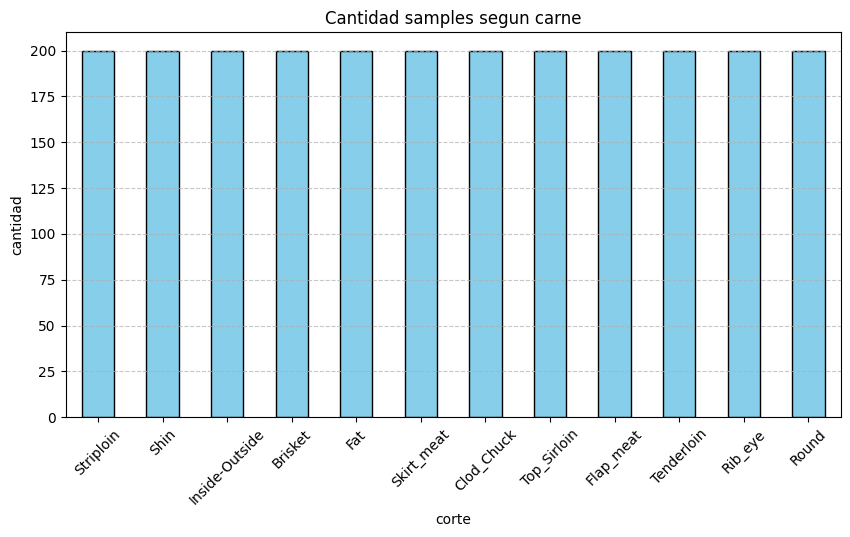

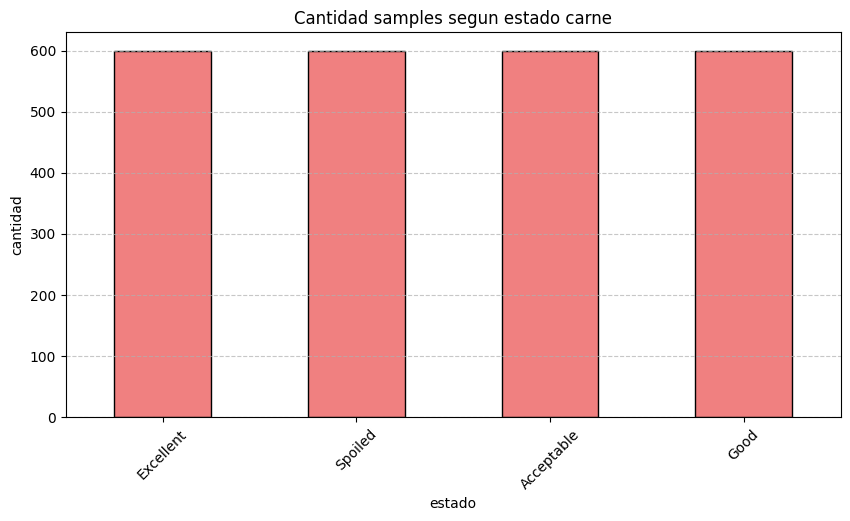

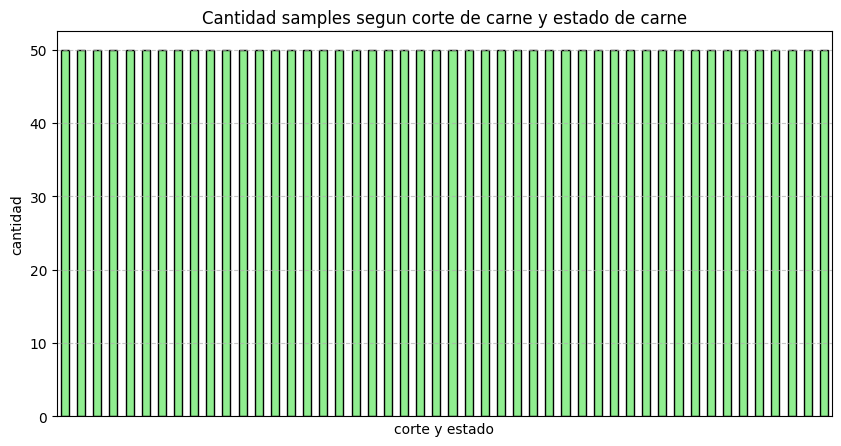

In [ ]:
# Seleccionar solo las columnas no numéricas
non_numeric_cols = df.select_dtypes(exclude=['number'])

# Contar el número de filas por tipo de carne y estado
type_counts = df['Cut'].value_counts()
state_counts = df['Label'].value_counts()
type_state_counts = df.groupby("Cut")['Label'].value_counts()


plt.figure(figsize=(10, 5))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad samples segun carne')
plt.xlabel('corte')
plt.ylabel('cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
state_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Cantidad samples segun estado carne')
plt.xlabel('estado')
plt.ylabel('cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
type_state_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Cantidad samples segun corte de carne y estado de carne')
plt.xlabel('corte y estado')
plt.ylabel('cantidad')
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Podemos observar tras este estudio que la muestra es totalmente uniforme lo cual nos será util pues sabemos que a la hora de entrenar el modelo tendremos una cantidad de muestras igualitaria (25%) para cada estado pues no hay un tipo de sample predominante. Aún así haremos uso de la estratificación, que explicaré más adelante, pero, en este caso no sería dramático si no se hiciese.

Voy a ver la media, mediana y varianza de cada sensor de gas para el total de carnes y despues según el tipo de carne para llegar a ciertas conclusiones

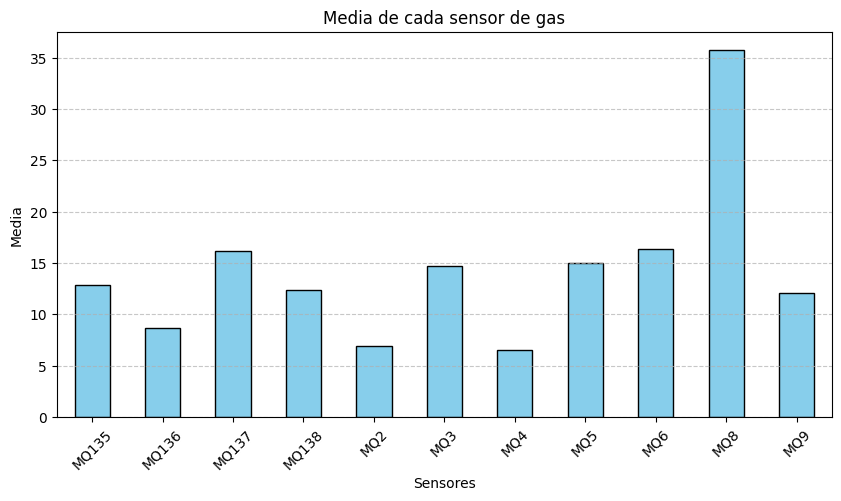

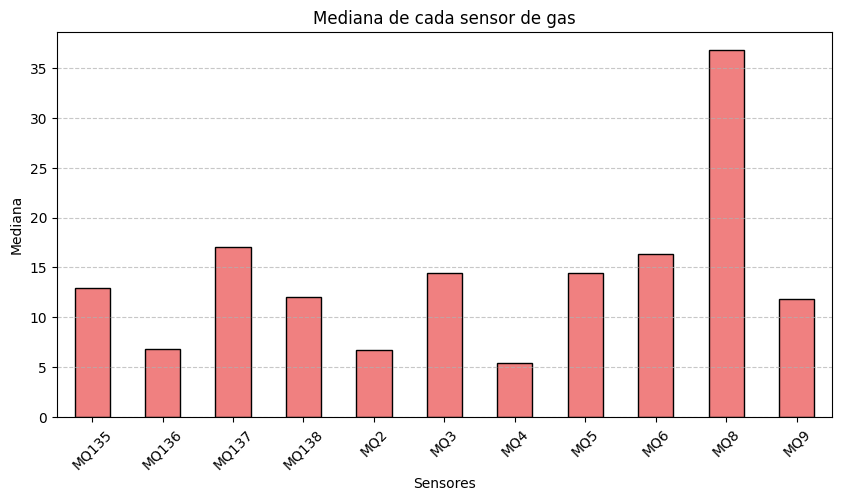

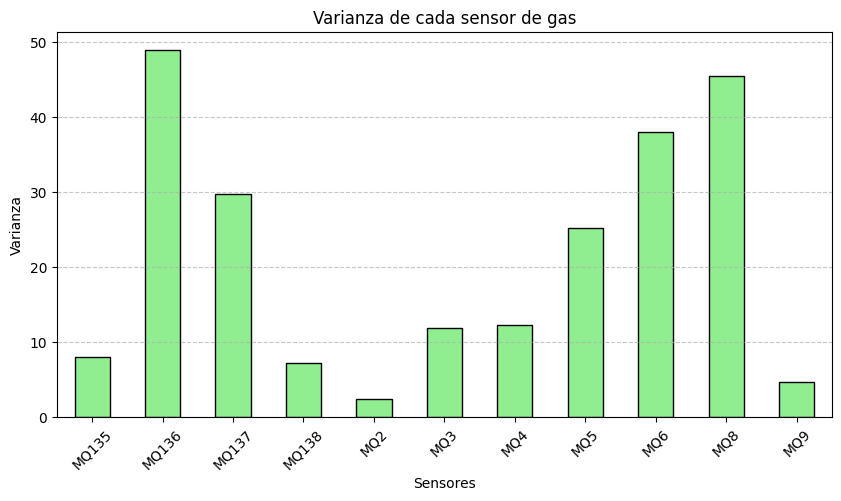

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['number'])
numeric_means = numeric_cols.mean()
numeric_medians = numeric_cols.median()
numeric_variances = numeric_cols.var()

# Crear gráfica de barras para la media
plt.figure(figsize=(10, 5))
numeric_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Media de cada sensor de gas')
plt.xlabel('Sensores')
plt.ylabel('Media')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crear gráfica de barras para la mediana
plt.figure(figsize=(10, 5))
numeric_medians.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Mediana de cada sensor de gas')
plt.xlabel('Sensores')
plt.ylabel('Mediana')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crear gráfica de barras para la varianza
plt.figure(figsize=(10, 5))
numeric_variances.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Varianza de cada sensor de gas')
plt.xlabel('Sensores')
plt.ylabel('Varianza')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

De estas gráficas observamos en general que las medias y medianas son relativamente parecidas en todos los sensores de gases menos en el MQ8. Además que la varianza de los sensores de gases MQ8 y MQ136 son bastante altas asi que es probable que luego interese quedarse con estas características para entrenar el modelo, pero habrá que hacer un estudio más profundo pues puede que tengan varianza alta pero que no sean determinantes para la predicción, este estudio se hará más profundo más adelante , primero observemos más características generales de los datos.

Ahora voy a comprobar como se comportan los datos graficandolos

In [ ]:
# Obtenemos la informacion segmentando los datos
#en las cuatro categorías de calidad de la carne para graficarlos de forma diferenciada.

spoiled = df[df['Label'] == 'Spoiled'].values
good = df[df['Label'] == 'Good'].values
acceptable = df[df['Label'] == 'Acceptable'].values
excellent = df[df['Label'] == 'Excellent'].values


Voy a graficar 2 a 2 los gases detectados por los sensores  para observar si en general son fácilmente separables los estados de la carne por rectas, si fuera así, podría probar a graficar conjuntamente más y ver si se sigue cumpliendo. Si fuera el caso podría usar un PCA para la extracción de características, esto es asi pues PCA es útil si los datos tienen una estructura aproximadamente linealmente separable debido a su funcionamiento. Si los datos tienen una estructura altamente no lineal, PCA no será la mejor opción porque solo captura variaciones lineales y optaremos por otra vía.

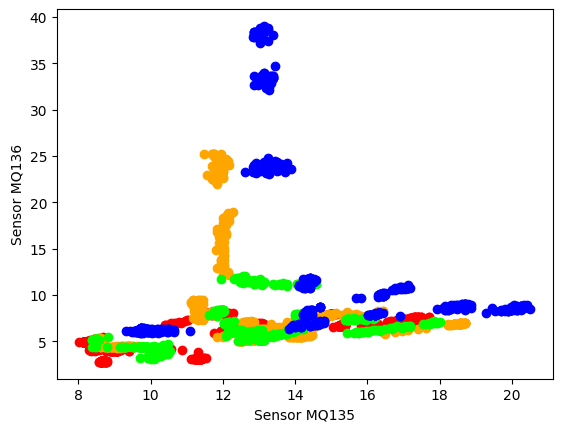

In [ ]:
plt.figure()
plt.scatter(spoiled[:,0], spoiled[:,1], color = 'red')
plt.scatter(good[:,0], good[:,1], color = 'orange')
plt.scatter(acceptable[:,0], acceptable[:,1], color = 'lime')
plt.scatter(excellent[:,0], excellent[:,1], color = 'blue')

plt.xlabel('Sensor MQ135')
plt.ylabel('Sensor MQ136')
plt.show()

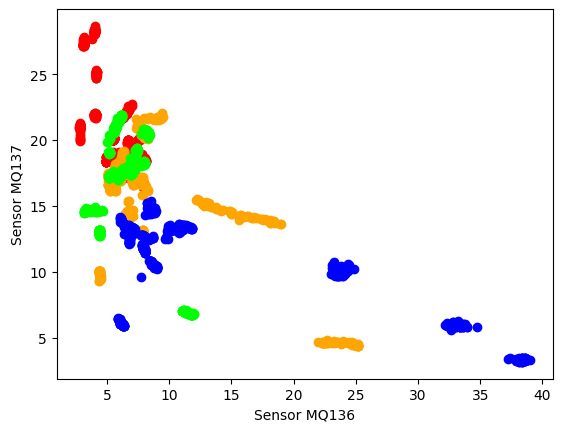

In [ ]:
plt.figure()
plt.scatter(spoiled[:,1], spoiled[:,2], color = 'red')
plt.scatter(good[:,1], good[:,2], color = 'orange')
plt.scatter(acceptable[:,1], acceptable[:,2], color = 'lime')
plt.scatter(excellent[:,1], excellent[:,2], color = 'blue')

plt.xlabel('Sensor MQ136')
plt.ylabel('Sensor MQ137')
plt.show()

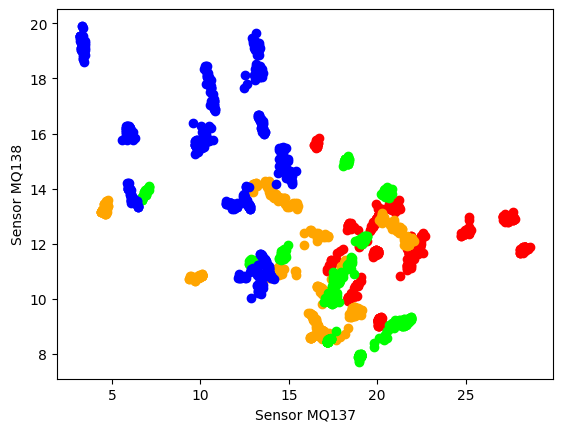

In [ ]:
plt.figure()
plt.scatter(spoiled[:,2], spoiled[:,3], color = 'red')
plt.scatter(good[:,2], good[:,3], color = 'orange')
plt.scatter(acceptable[:,2], acceptable[:,3], color = 'lime')
plt.scatter(excellent[:,2], excellent[:,3], color = 'blue')

plt.xlabel('Sensor MQ137')
plt.ylabel('Sensor MQ138')
plt.show()

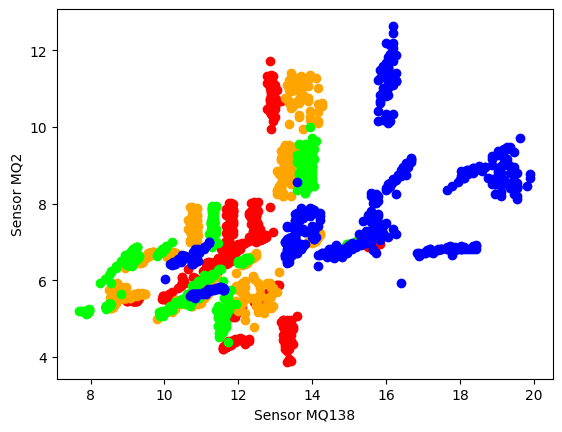

In [ ]:
plt.figure()
plt.scatter(spoiled[:,3], spoiled[:,4], color = 'red')
plt.scatter(good[:,3], good[:,4], color = 'orange')
plt.scatter(acceptable[:,3], acceptable[:,4], color = 'lime')
plt.scatter(excellent[:,3], excellent[:,4], color = 'blue')

plt.xlabel('Sensor MQ138')
plt.ylabel('Sensor MQ2')
plt.show()

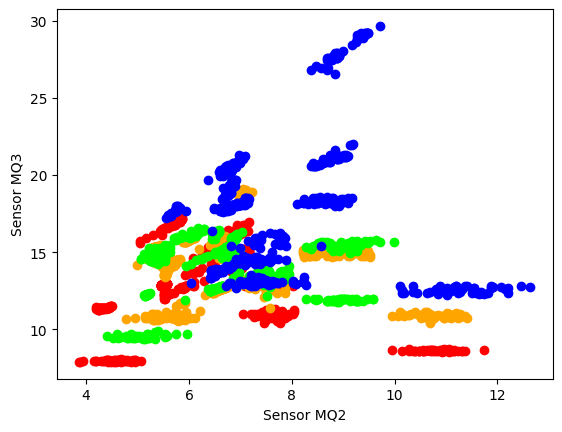

In [ ]:
plt.figure()
plt.scatter(spoiled[:,4], spoiled[:,5], color = 'red')
plt.scatter(good[:,4], good[:,5], color = 'orange')
plt.scatter(acceptable[:,4], acceptable[:,5], color = 'lime')
plt.scatter(excellent[:,4], excellent[:,5], color = 'blue')

plt.xlabel('Sensor MQ2')
plt.ylabel('Sensor MQ3')
plt.show()

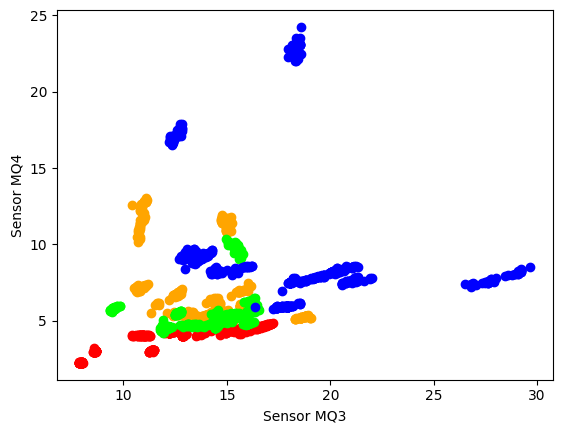

In [ ]:
plt.figure()
plt.scatter(spoiled[:,5], spoiled[:,6], color = 'red')
plt.scatter(good[:,5], good[:,6], color = 'orange')
plt.scatter(acceptable[:,5], acceptable[:,6], color = 'lime')
plt.scatter(excellent[:,5], excellent[:,6], color = 'blue')

plt.xlabel('Sensor MQ3')
plt.ylabel('Sensor MQ4')
plt.show()

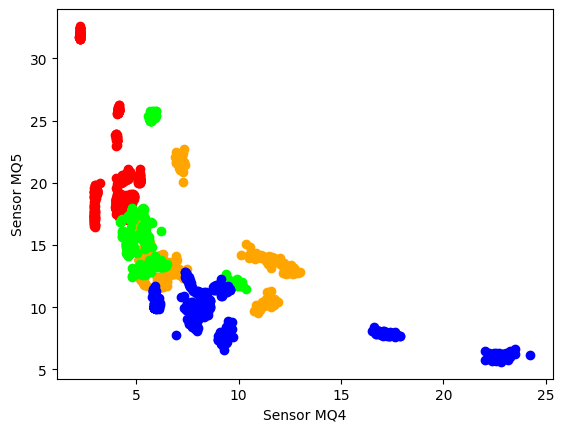

In [ ]:
plt.figure()
plt.scatter(spoiled[:,6], spoiled[:,7], color = 'red')
plt.scatter(good[:,6], good[:,7], color = 'orange')
plt.scatter(acceptable[:,6], acceptable[:,7], color = 'lime')
plt.scatter(excellent[:,6], excellent[:,7], color = 'blue')

plt.xlabel('Sensor MQ4')
plt.ylabel('Sensor MQ5')
plt.show()

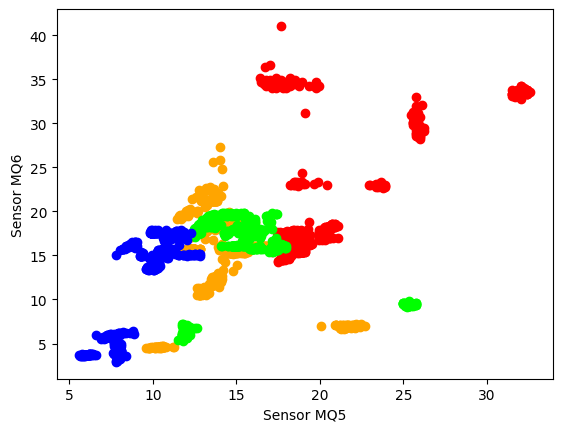

In [ ]:
plt.figure()
plt.scatter(spoiled[:,7], spoiled[:,8], color = 'red')
plt.scatter(good[:,7], good[:,8], color = 'orange')
plt.scatter(acceptable[:,7], acceptable[:,8], color = 'lime')
plt.scatter(excellent[:,7], excellent[:,8], color = 'blue')

plt.xlabel('Sensor MQ5')
plt.ylabel('Sensor MQ6')
plt.show()

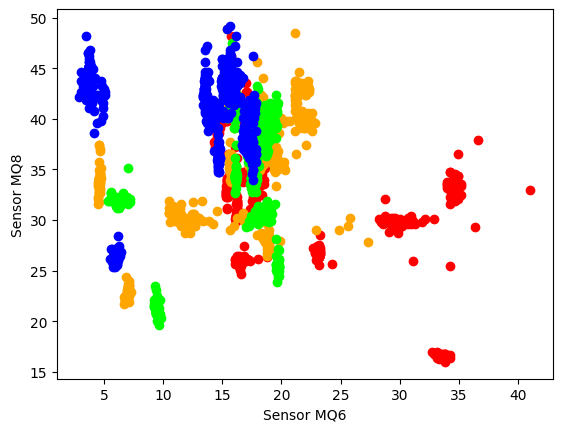

In [ ]:
plt.figure()
plt.scatter(spoiled[:,8], spoiled[:,9], color = 'red')
plt.scatter(good[:,8], good[:,9], color = 'orange')
plt.scatter(acceptable[:,8], acceptable[:,9], color = 'lime')
plt.scatter(excellent[:,8], excellent[:,9], color = 'blue')

plt.xlabel('Sensor MQ6')
plt.ylabel('Sensor MQ8')
plt.show()

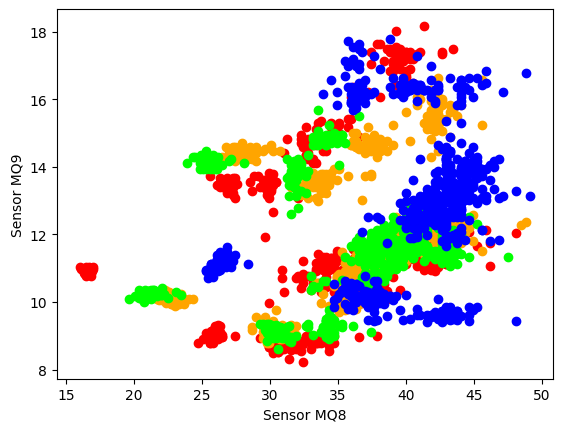

In [ ]:
plt.figure()
plt.scatter(spoiled[:,9], spoiled[:,10], color = 'red')
plt.scatter(good[:,9], good[:,10], color = 'orange')
plt.scatter(acceptable[:,9], acceptable[:,10], color = 'lime')
plt.scatter(excellent[:,9], excellent[:,10], color = 'blue')

plt.xlabel('Sensor MQ8')
plt.ylabel('Sensor MQ9')
plt.show()

Observando las gráficas, veo que en general no es facil visualizar rectas que separen los estados de la carne por lo que descartaré el uso de pca.

Para poder concluir el estudio anterior voy a estudiar el coeficiente de variacion, el cual se calcula como:

$CV= {\sigma\over{\overline{x}}}$

In [ ]:
std_dev = numeric_cols.std() #Calculamos desviación tipica de cada gas
mean = numeric_cols.mean() #Calculamos media de cada gas
cv = (std_dev / mean) * 100
#Formula del coeficiente de variacion que es desviacion tipica entre media por
#100

print("Coeficiente de variación (CV) para cada Gas:")
print(cv)

Coeficiente de variación (CV) para cada Gas:
MQ135    21.984715
MQ136    80.768586
MQ137    33.765305
MQ138    21.637752
MQ2      22.518475
MQ3      23.394158
MQ4      53.594234
MQ5      33.436427
MQ6      37.637044
MQ8      18.850062
MQ9      17.888391
dtype: float64


De aquí podemos sacar conclusiones más claras. Observemos que el coeficiente de variacion de los sensores de gases MQ8 Y MQ9 son muy bajos. Esto nos dice que realmente no varian mucho, es decir, la suposición anterior sobre MQ8 no era del todo acertada y es más bien un gas que puede que no sea muy relevante a la hora de entrenar el modelo comparado con otros que tienen mayor coeficiente de variación. Esto lo pienso asi pues, si el CV es alto, significa que los datos tienen una gran dispersión en relación con su media indicando que los datos contienen una gran cantidad de información y diversidad que el modelo podrá usar para aprender. Ahora bien, habrá que tener cuidado porque tenemos que ver si hay muchos datos atípicos porque eso afecta en el coeficiente de variación aumentandolo y por lo tanto dandonos una información no completa.

Ahora para ver si hay muchos datos atípicos usaré las gráficas de caja y bigotes, los cuales son gráficas que permiten ver con cierta fácilidad la cantidad y predominancia de estos datos

In [ ]:
MQ135 = df['MQ135']
MQ136 = df['MQ136']
MQ137 = df['MQ137']
MQ138 = df['MQ138']
MQ2 = df['MQ2']
MQ3 = df['MQ3']
MQ4 = df['MQ4']
MQ5 = df['MQ5']
MQ6 = df['MQ6']
MQ8 = df['MQ8']
MQ9 = df['MQ9']
State= df['Label']

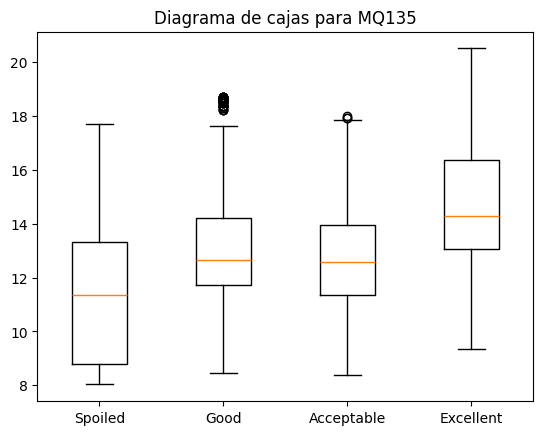

In [ ]:
MQ135_spoiled = MQ135[(State== 'Spoiled')]
MQ135_good = MQ135[(State== 'Good')]
MQ135_acceptable = MQ135[(State== 'Acceptable')]
MQ135_excellent = MQ135[(State== 'Excellent')]
plt.title(f"Diagrama de cajas para MQ135")
plt.boxplot([MQ135_spoiled, MQ135_good, MQ135_acceptable, MQ135_excellent], tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

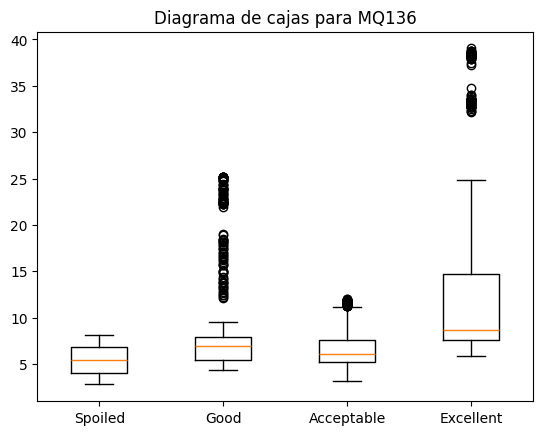

In [ ]:
MQ136_spoiled = MQ136[(State== 'Spoiled')]
MQ136_good = MQ136[(State== 'Good')]
MQ136_acceptable = MQ136[(State== 'Acceptable')]
MQ136_excellent = MQ136[(State== 'Excellent')]
plt.title(f"Diagrama de cajas para MQ136")
plt.boxplot([MQ136_spoiled, MQ136_good, MQ136_acceptable, MQ136_excellent], tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

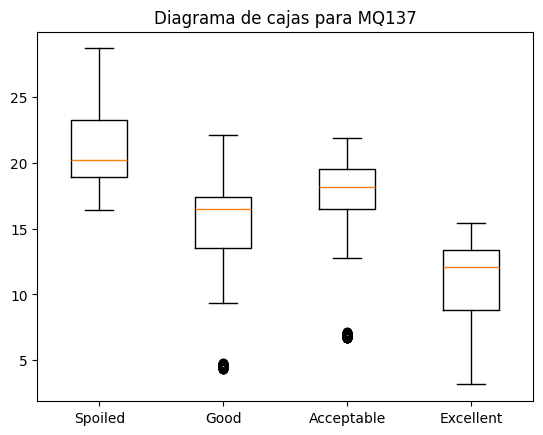

In [ ]:
MQ137_spoiled = MQ137[(State == 'Spoiled')]
MQ137_good = MQ137[(State == 'Good')]
MQ137_acceptable = MQ137[(State == 'Acceptable')]
MQ137_excellent = MQ137[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ137")
plt.boxplot([MQ137_spoiled, MQ137_good, MQ137_acceptable, MQ137_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()


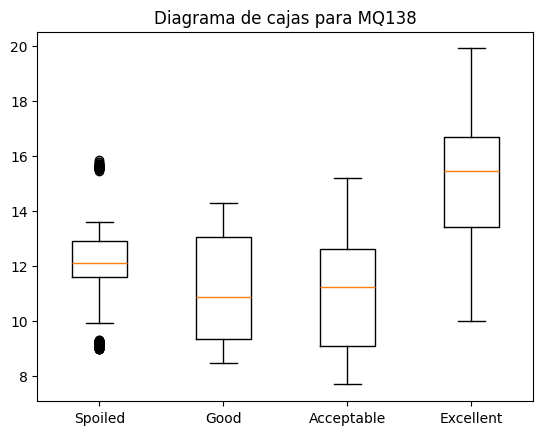

In [ ]:
MQ138_spoiled = MQ138[(State == 'Spoiled')]
MQ138_good = MQ138[(State == 'Good')]
MQ138_acceptable = MQ138[(State == 'Acceptable')]
MQ138_excellent = MQ138[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ138")
plt.boxplot([MQ138_spoiled, MQ138_good, MQ138_acceptable, MQ138_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

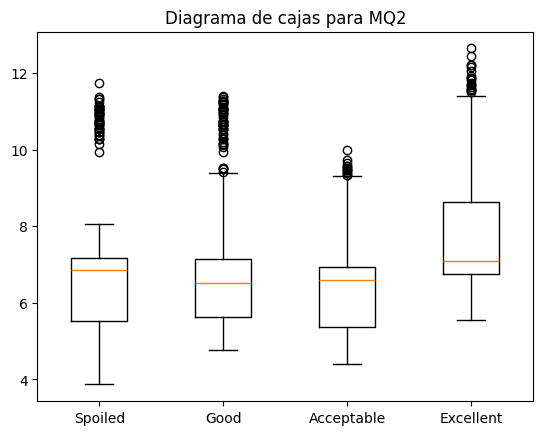

In [ ]:
MQ2_spoiled = MQ2[(State == 'Spoiled')]
MQ2_good = MQ2[(State == 'Good')]
MQ2_acceptable = MQ2[(State == 'Acceptable')]
MQ2_excellent = MQ2[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ2")
plt.boxplot([MQ2_spoiled, MQ2_good, MQ2_acceptable, MQ2_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

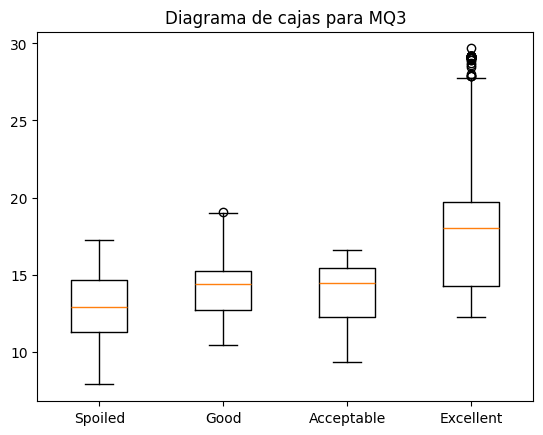

In [ ]:
MQ3_spoiled = MQ3[(State == 'Spoiled')]
MQ3_good = MQ3[(State == 'Good')]
MQ3_acceptable = MQ3[(State == 'Acceptable')]
MQ3_excellent = MQ3[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ3")
plt.boxplot([MQ3_spoiled, MQ3_good, MQ3_acceptable, MQ3_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

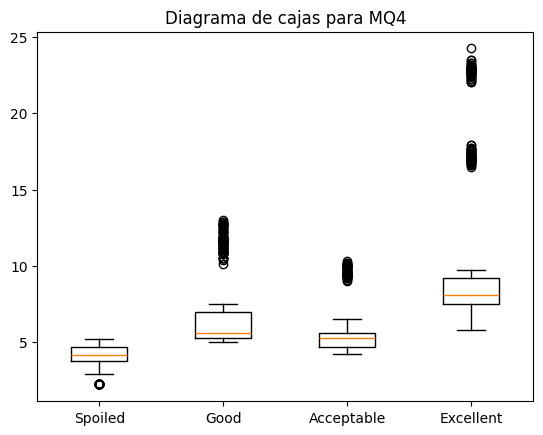

In [ ]:
MQ4_spoiled = MQ4[(State == 'Spoiled')]
MQ4_good = MQ4[(State == 'Good')]
MQ4_acceptable = MQ4[(State == 'Acceptable')]
MQ4_excellent = MQ4[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ4")
plt.boxplot([MQ4_spoiled, MQ4_good, MQ4_acceptable, MQ4_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

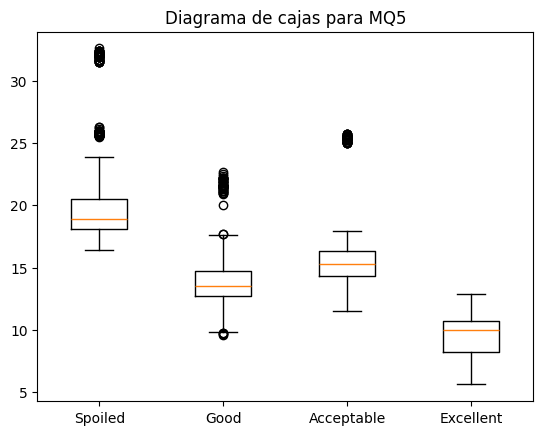

In [ ]:
MQ5_spoiled = MQ5[(State == 'Spoiled')]
MQ5_good = MQ5[(State == 'Good')]
MQ5_acceptable = MQ5[(State == 'Acceptable')]
MQ5_excellent = MQ5[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ5")
plt.boxplot([MQ5_spoiled, MQ5_good, MQ5_acceptable, MQ5_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

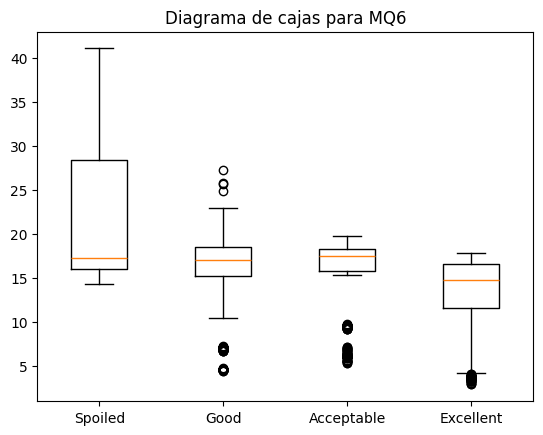

In [ ]:
MQ6_spoiled = MQ6[(State == 'Spoiled')]
MQ6_good = MQ6[(State == 'Good')]
MQ6_acceptable = MQ6[(State == 'Acceptable')]
MQ6_excellent = MQ6[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ6")
plt.boxplot([MQ6_spoiled, MQ6_good, MQ6_acceptable, MQ6_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

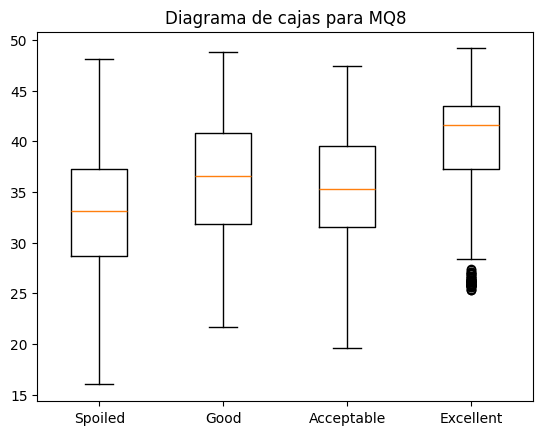

In [ ]:
MQ8_spoiled = MQ8[(State == 'Spoiled')]
MQ8_good = MQ8[(State == 'Good')]
MQ8_acceptable = MQ8[(State == 'Acceptable')]
MQ8_excellent = MQ8[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ8")
plt.boxplot([MQ8_spoiled, MQ8_good, MQ8_acceptable, MQ8_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

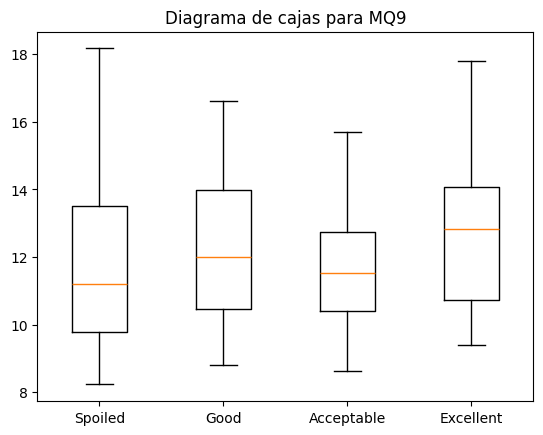

In [ ]:
MQ9_spoiled = MQ9[(State == 'Spoiled')]
MQ9_good = MQ9[(State == 'Good')]
MQ9_acceptable = MQ9[(State == 'Acceptable')]
MQ9_excellent = MQ9[(State == 'Excellent')]

plt.title(f"Diagrama de cajas para MQ9")
plt.boxplot([MQ9_spoiled, MQ9_good, MQ9_acceptable, MQ9_excellent],
            tick_labels=['Spoiled', 'Good', 'Acceptable', 'Excellent'])
plt.show()

Primero antes de llegar a una conclusión voy a hacer una disquisición.
Hay dos tipos de outliers:

-**Outliers válidos**: Son aquellos que tienen sentido en el contexto del problema y no son el resultado de errores. Pueden ser datos importantes que reflejen variabilidad natural o condiciones especiales.

-**Outliers no válidos**: Son aquellos que son el resultado de errores de medición, registro o procesamiento, y deben ser corregidos o eliminados.


De estas gráficas podemos concluir que los datos realmente son relativamente buenos, pues excepto en 3 gases MQ136,MQ2 y MQ4, la muestra no presentan muchos datos atípicos. Para estos gases realmente no se realizará un tratamiento de datos atípicos porque debido a la cantidad de datos atípicos que hay, deduzco que quizá no son átipicos, sino que, estos datos podrian ser relevantes para la predicción del estado de la carne.
Además, ahora sabemos que la información de los coeficientes de variacion para esos gases no es tan real y que no podemos asegurar que el gas MQ136 sea el mejor para entrenar el modelo, siguamos pues extrayendo conclusiones

##SelectKbest
Ahora voy a hacer uso para intentar confirmar esta hipótesis de SelectKBest que es una técnica de selección de características que:

1-Evalúa cada característica individualmente utilizando una función de puntuación (score_func) y las ordena según su puntuación.

2-Selecciona las k características con las puntuaciones más altas.

3-Devuelve un subconjunto del dataset original con solo esas k características.

En este caso usaré la prueba ANOVA F-value (f_classif) para evaluar la relación entre cada característica y la variable objetivo.

En el siguiente ejemplo seleccionará las 5 características con los F-values más altos pero después en los datos que cogeremos serán 3, esto es un mero ejemplo de funcionamiento.

###Funcionamiento f_classif
Calcula el F-value para cada característica, que mide la relación entre la característica y la variable objetivo.

Un F-value más alto indica que la característica es más útil para predecir la variable objetivo.

La fórmula del F-value es:

F= (Varianza entre grupos)/(Varianza dentro de los grupos)

Varianza entre grupos: Mide cuánto difieren las medias de los grupos (clases) para una característica dada.

Varianza dentro de los grupos: Mide la dispersión de los valores dentro de cada grupo.

Es util para problemas de clasificación pues mide cuánto difieren las medias de las características entre las clases. Si una característica tiene medias muy diferentes entre clases, es más útil para distinguirlas.

In [ ]:
k_best = SelectKBest(score_func=f_classif, k=5)
X = df.select_dtypes(include=['number'])
y = df['Label']
k_best.fit_transform(X,y)
print("--------------")

--------------


In [ ]:
# Obtener la máscara booleana de las características seleccionadas
selected_features_mask = k_best.get_support()

# Mostrar la máscara booleana
print("Máscara booleana de las características seleccionadas:", selected_features_mask)

Máscara booleana de las características seleccionadas: [False False  True  True False  True  True  True False False False]


Aquí podemos observar que usando f1_classif como función de puntuación y cinco gases, esta selección me escoge los gases: MQ137,MQ138,MQ3,MQ4 y MQ5. De aquí deducimos que efectivamente el gas MQ136 no era realmente tan relevante para la predicción en el problema (o al menos eso se determina con la score_func f1_classif).

##Prueba de modelo sin tratamiento de datos
Bien, Previo a seguir con el tratado de los datos voy a ver como se comportaría un modelo si le introduzco los datos sin ningun tratamiento.
(El código posterior lo explicaré más adelante pues ahora mismo lo que queremos ver es el comportamiento, no es necesario ahora mismo saber el funcionamiento del procedimiento que hago,además usaré para esta prueba rfc porque es bueno en problemas de clasificación pero más adelante se explica con más detalle)

In [1]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, cv=10, scoring='f1_weighted'):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Validación cruzada con múltiples métricas
    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision_weighted': 'precision_weighted',
        'recall_weighted': 'recall_weighted',
        'f1_weighted': 'f1_weighted'
    }
    validation_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=True
    )

    # Predicción en conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de evaluación en conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Métricas de evaluación en conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Matriz de confusión para conjunto de prueba
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Resultados de validación cruzada
    print("Resultados de Validación Cruzada:")
    for metric in scoring_metrics:
        print(f" - {metric.capitalize()}:")
        print(f"   - Train: {np.mean(validation_results[f'train_{metric}']):.4f}")
        print(f"   - Test: {np.mean(validation_results[f'test_{metric}']):.4f}")

    # Resultados en conjunto de entrenamiento y prueba
    print("\nResultados en Conjunto de Entrenamiento:")
    print(f" - Accuracy: {train_accuracy:.4f}")
    print(f" - Precision: {train_precision:.4f}")
    print(f" - Recall: {train_recall:.4f}")
    print(f" - F1 Score: {train_f1:.4f}")

    print("\nResultados en Conjunto de Prueba:")
    print(f" - Accuracy: {test_accuracy:.4f}")
    print(f" - Precision: {test_precision:.4f}")
    print(f" - Recall: {test_recall:.4f}")
    print(f" - F1 Score: {test_f1:.4f}")

    # Tiempos de entrenamiento y evaluación
    print("\nTiempos:")
    print(f" - Mean Training Time: {np.mean(validation_results['fit_time']):.4f} seconds")
    print(f" - Mean Scoring Time: {np.mean(validation_results['score_time']):.4f} seconds")

    # Visualización de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión - {model.__class__.__name__}')
    plt.show()

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 1.0000
   - Test: 0.9994
 - Precision_weighted:
   - Train: 1.0000
   - Test: 0.9994
 - Recall_weighted:
   - Train: 1.0000
   - Test: 0.9994
 - F1_weighted:
   - Train: 1.0000
   - Test: 0.9994

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9986
 - Precision: 0.9986
 - Recall: 0.9986
 - F1 Score: 0.9986

Tiempos:
 - Mean Training Time: 0.8538 seconds
 - Mean Scoring Time: 0.0660 seconds


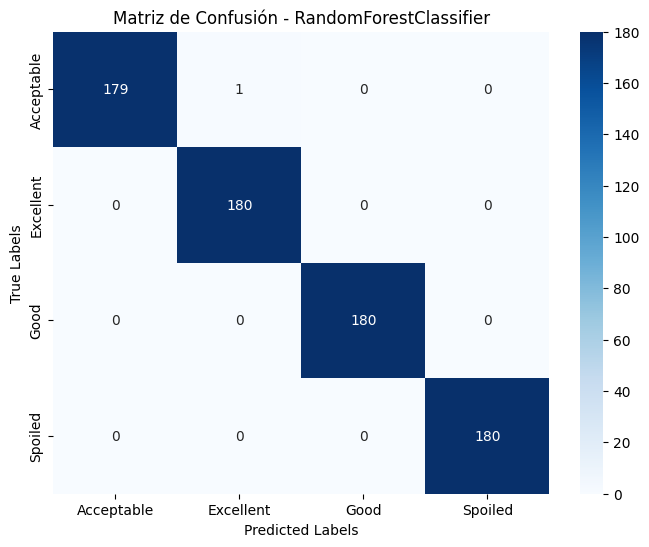

In [ ]:
X=df.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

Observamos que predice extremadamente bien sin procesar los datos. Por lo tanto el objetivo será mantener el buen nivel de predicción (accuracy) pero reduciendo el número sensores de gas, haciendo así posible crear un modelo que pagando y que tengamos una buena predicción pagando el mínimo posible para ella

## Seguimos con el preprocesamiento de datos
Por lo expuesto anteriormente no veo necesario realizar un tratamiento de valores perdidos, tampoco veo necesario el tratamiento de outliers con estos datos y por lo ya expuesto no voy a hacer uso de pca, así que procedo a realizar una selección de características, ya hemos visto que el select_kbest con la función de puntuación f1_classif nos daba los mejores k bajo esa función, lo que vamos a ver ahora es, manualmente si podemos extraer usando correlaciones una selección de características decente para resolver el problema.

Estudiemos la matriz de correlaciones, así podremos decir que sensores de gas podemos descartar pues si tienen mucha correlación las muestras dos gases podremos obviar uno de los sensores a la hora de entrenar pues sus datos son deducibles a partir de los del otro.

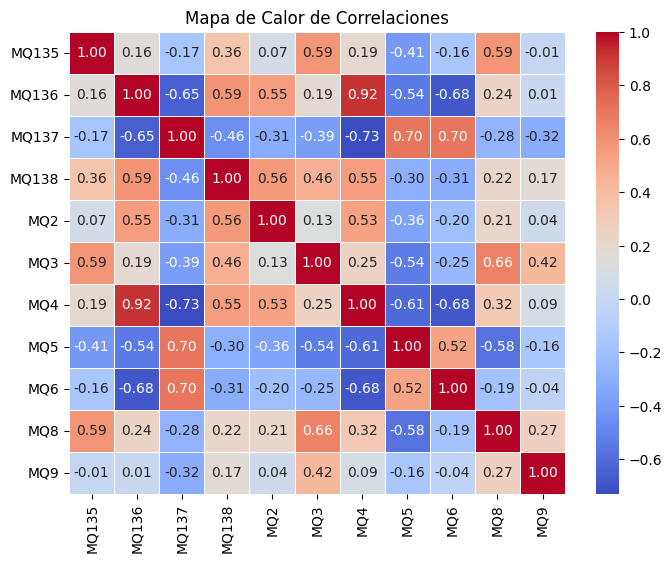

In [ ]:
# Calcular la matriz de correlación solo para columnas numéricas
df2= pd.read_csv(path_to_data_classification)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Observamos que hay varios gases con bastante correlación,pero hay otros con muy poca (indicio de que pca puede que no fuera tan buena opción).Podremos obviar algunos de los que tengan gran correlación, vamos a proceder a quitar el gas MQ136 pues es explicado por el MQ4

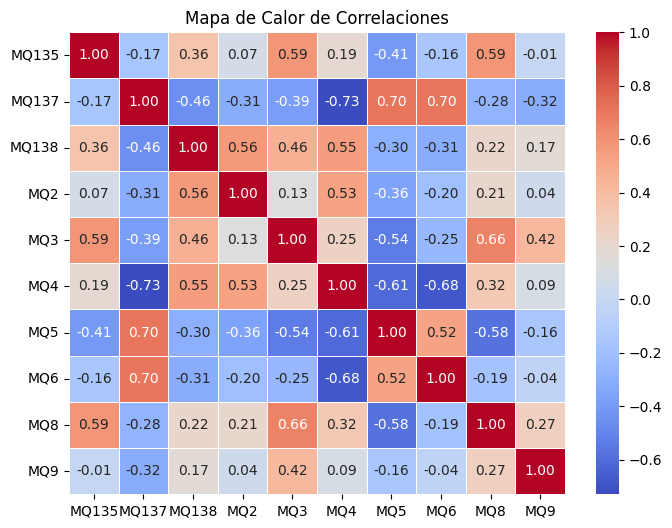

In [ ]:
df2 = df2.drop('MQ136', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

MQ4 por MQ137

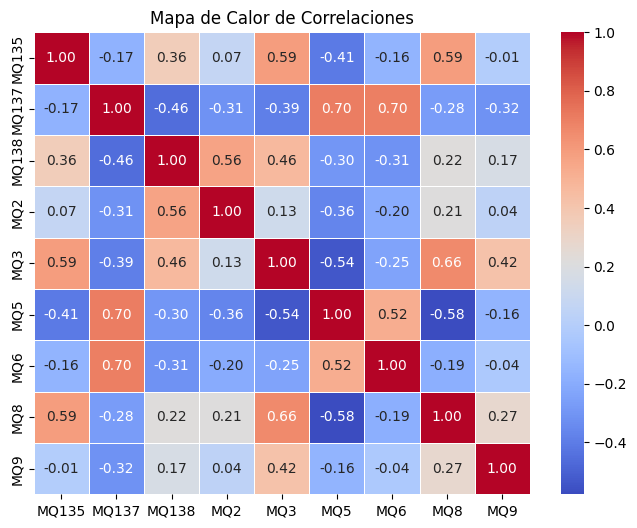

In [ ]:
#136 y 137
df2 = df2.drop('MQ4', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

MQ137 POR MQ6

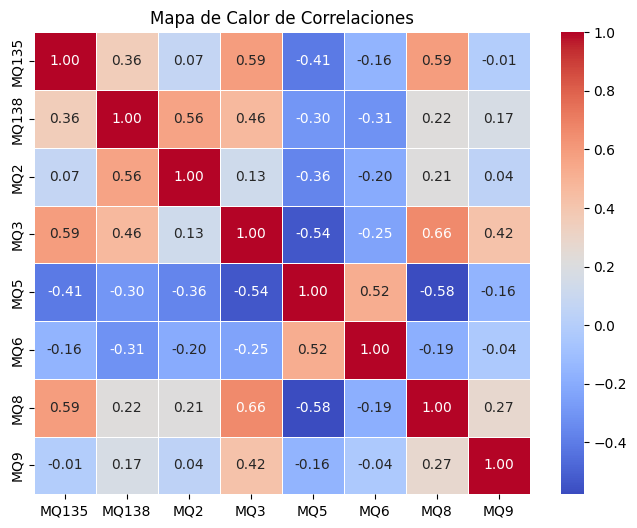

In [ ]:
df2 = df2.drop('MQ137', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Hago una prueba con estos datos para ver si se ha reducido el accuracy significativamente o pinta bien el proceso

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 1.0000
   - Test: 0.9982
 - Precision_weighted:
   - Train: 1.0000
   - Test: 0.9983
 - Recall_weighted:
   - Train: 1.0000
   - Test: 0.9982
 - F1_weighted:
   - Train: 1.0000
   - Test: 0.9982

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9986
 - Precision: 0.9986
 - Recall: 0.9986
 - F1 Score: 0.9986

Tiempos:
 - Mean Training Time: 0.5109 seconds
 - Mean Scoring Time: 0.0317 seconds


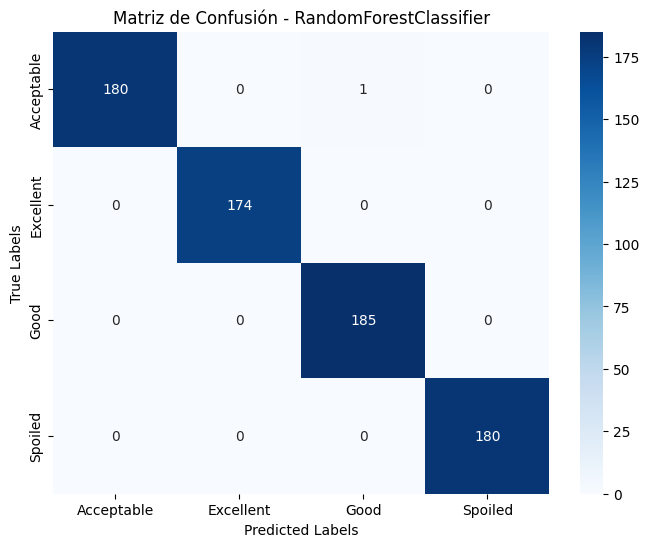

In [ ]:
X=df2.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

Vemos que sigue dando buenisimos resultados luego voy a probar a quitar más sensores quedandome con aquellos más relevantes

MQ3 por MQ8

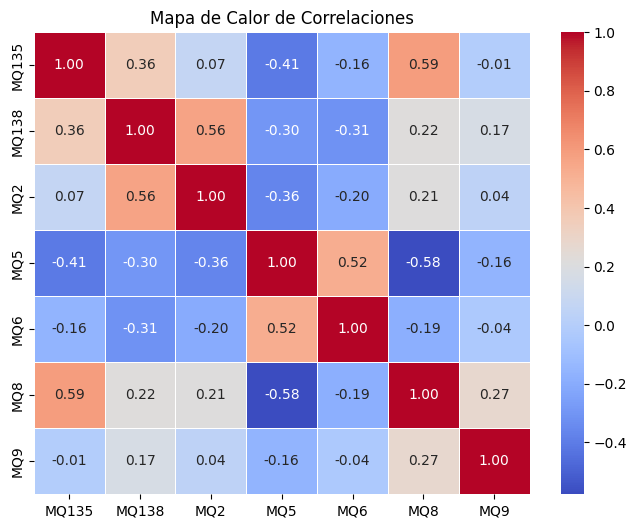

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 1.0000
   - Test: 0.9970
 - Precision_weighted:
   - Train: 1.0000
   - Test: 0.9971
 - Recall_weighted:
   - Train: 1.0000
   - Test: 0.9970
 - F1_weighted:
   - Train: 1.0000
   - Test: 0.9970

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Resultados en Conjunto de Prueba:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Tiempos:
 - Mean Training Time: 0.4352 seconds
 - Mean Scoring Time: 0.0293 seconds


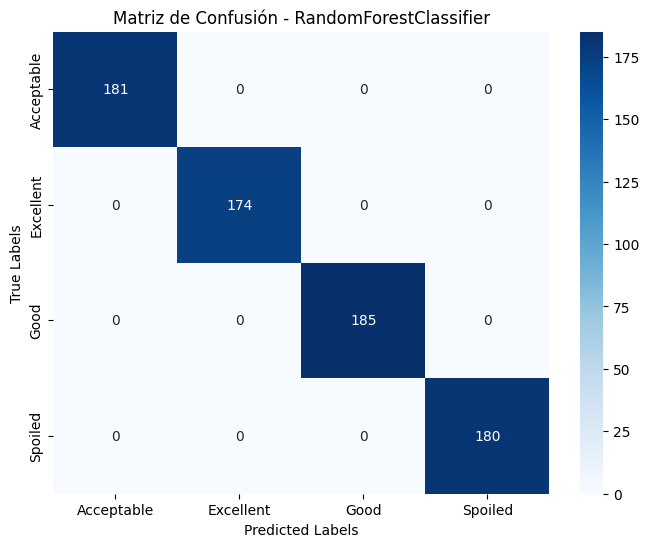

In [ ]:
df2 = df2.drop('MQ3', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()
X=df2.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

MQ135 por MQ8

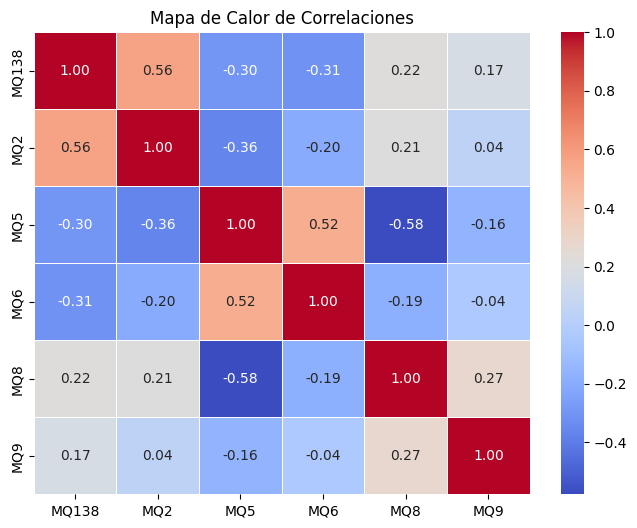

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 1.0000
   - Test: 0.9988
 - Precision_weighted:
   - Train: 1.0000
   - Test: 0.9988
 - Recall_weighted:
   - Train: 1.0000
   - Test: 0.9988
 - F1_weighted:
   - Train: 1.0000
   - Test: 0.9988

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Resultados en Conjunto de Prueba:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Tiempos:
 - Mean Training Time: 0.4263 seconds
 - Mean Scoring Time: 0.0340 seconds


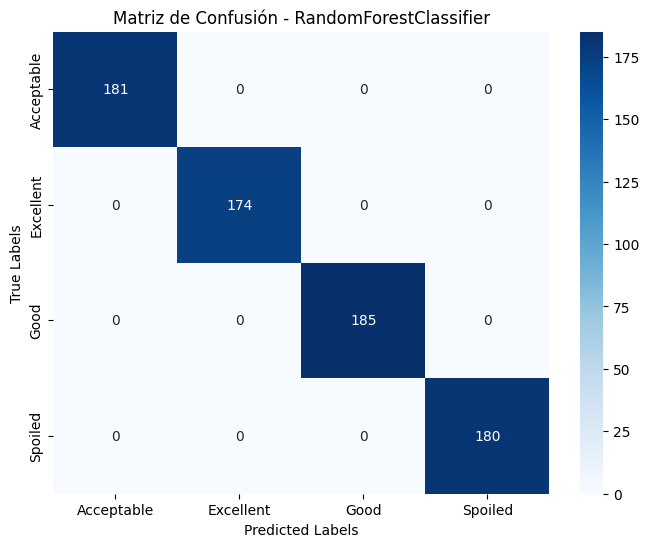

In [ ]:
df2 = df2.drop('MQ135', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()
X=df2.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

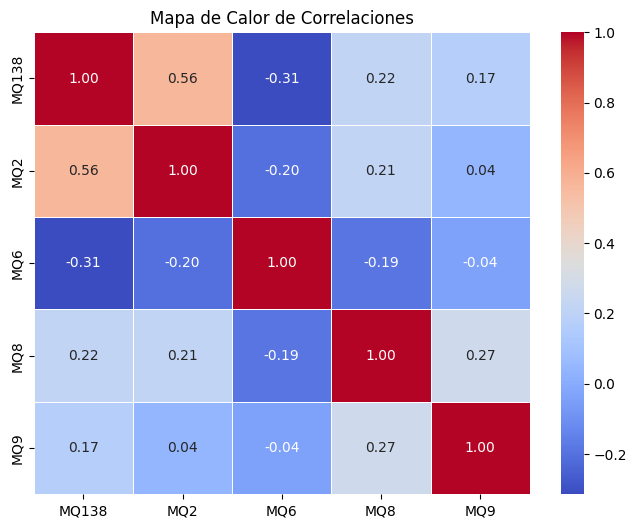

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 1.0000
   - Test: 0.9923
 - Precision_weighted:
   - Train: 1.0000
   - Test: 0.9924
 - Recall_weighted:
   - Train: 1.0000
   - Test: 0.9923
 - F1_weighted:
   - Train: 1.0000
   - Test: 0.9922

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9944
 - Precision: 0.9945
 - Recall: 0.9944
 - F1 Score: 0.9944

Tiempos:
 - Mean Training Time: 0.5752 seconds
 - Mean Scoring Time: 0.0359 seconds


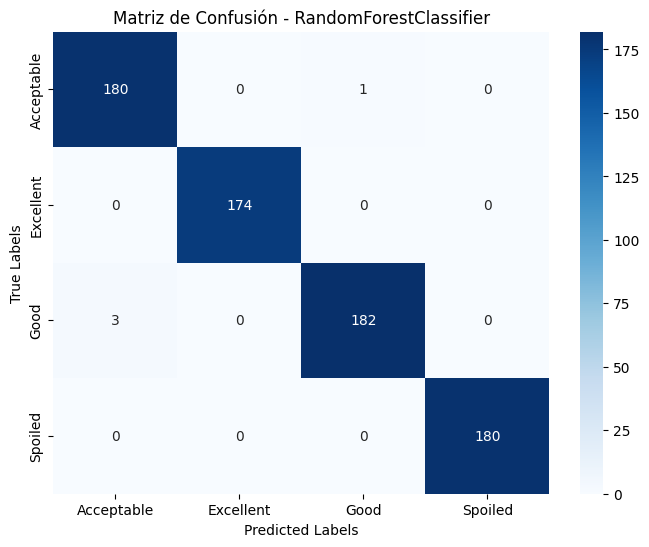

In [ ]:
df2 = df2.drop('MQ5', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()
X=df2.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

MQ138 por MQ2

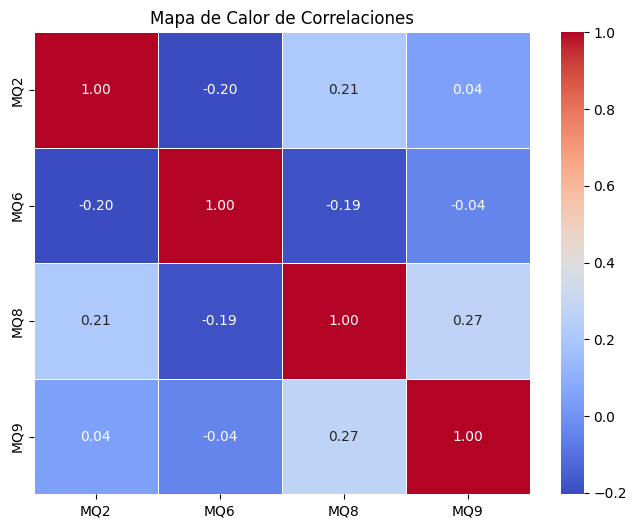

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 1.0000
   - Test: 0.9738
 - Precision_weighted:
   - Train: 1.0000
   - Test: 0.9745
 - Recall_weighted:
   - Train: 1.0000
   - Test: 0.9738
 - F1_weighted:
   - Train: 1.0000
   - Test: 0.9738

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9764
 - Precision: 0.9766
 - Recall: 0.9764
 - F1 Score: 0.9764

Tiempos:
 - Mean Training Time: 0.2915 seconds
 - Mean Scoring Time: 0.0197 seconds


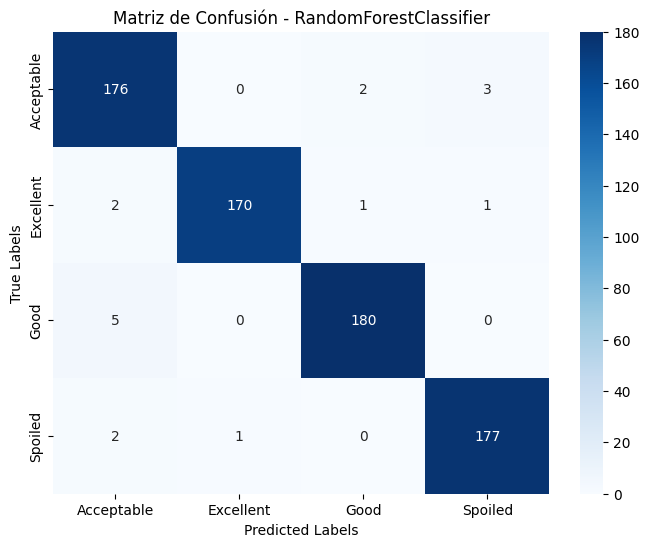

In [ ]:
df2 = df2.drop('MQ138', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()
X=df2.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

MQ2 por MQ8

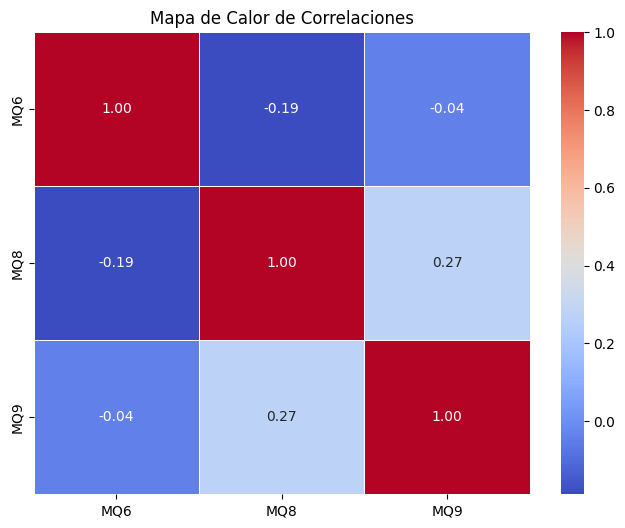

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.9995
   - Test: 0.9435
 - Precision_weighted:
   - Train: 0.9995
   - Test: 0.9449
 - Recall_weighted:
   - Train: 0.9995
   - Test: 0.9435
 - F1_weighted:
   - Train: 0.9995
   - Test: 0.9433

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.9994
 - Precision: 0.9994
 - Recall: 0.9994
 - F1 Score: 0.9994

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9347
 - Precision: 0.9354
 - Recall: 0.9347
 - F1 Score: 0.9349

Tiempos:
 - Mean Training Time: 0.2517 seconds
 - Mean Scoring Time: 0.0202 seconds


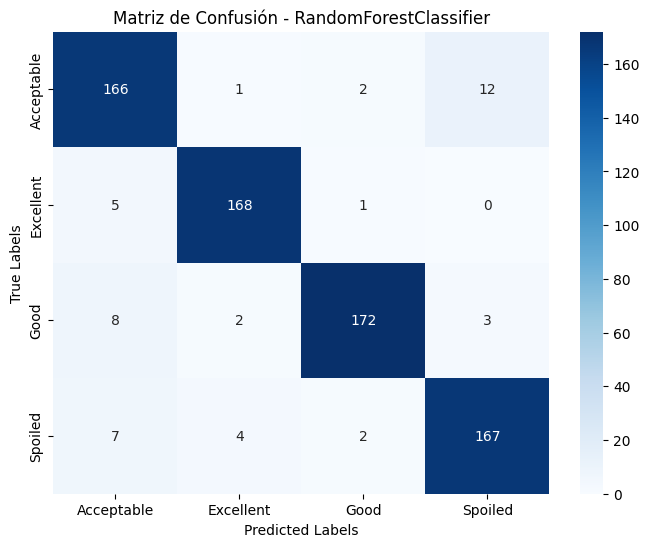

In [ ]:
df2 = df2.drop('MQ2', axis=1)
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()
X=df2.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

Hemos podido observar que la reducción de datos hasta 3 no ha afectado realmente mucho en los resultados ,en este caso del rfc (el cual he escogido conscientemente pues es muy bueno en problemas de clasificación), siguiendo el procedimiento realizado. Cabe destacar que no ha habido gran número de fallos pero podemos ver que los fallos han sido relevantes pues se da por aceptables,excelentes y buenos muestras que están podridas,lo cual son errores más importantes a decir que uno excelente este bien por ejemplo.Vamos a ver usando los gases que me indica el selectkbest con k = 3, pues si este predice mejor al que ya hemos observado nos quedaremos con esa elección de gases.Destacar que considero que quedarse con 3 sensores es una reducción significativa y suficiente del problema, sin embargo se podría probar con menos sensores aún si se quisiese y ver si da buenos resultados.

Máscara booleana de las características seleccionadas: [False False  True  True False False False  True False False False]
Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.9995
   - Test: 0.9917
 - Precision_weighted:
   - Train: 0.9995
   - Test: 0.9918
 - Recall_weighted:
   - Train: 0.9995
   - Test: 0.9917
 - F1_weighted:
   - Train: 0.9995
   - Test: 0.9917

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.9994
 - Precision: 0.9994
 - Recall: 0.9994
 - F1 Score: 0.9994

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9903
 - Precision: 0.9903
 - Recall: 0.9903
 - F1 Score: 0.9903

Tiempos:
 - Mean Training Time: 0.2695 seconds
 - Mean Scoring Time: 0.0221 seconds


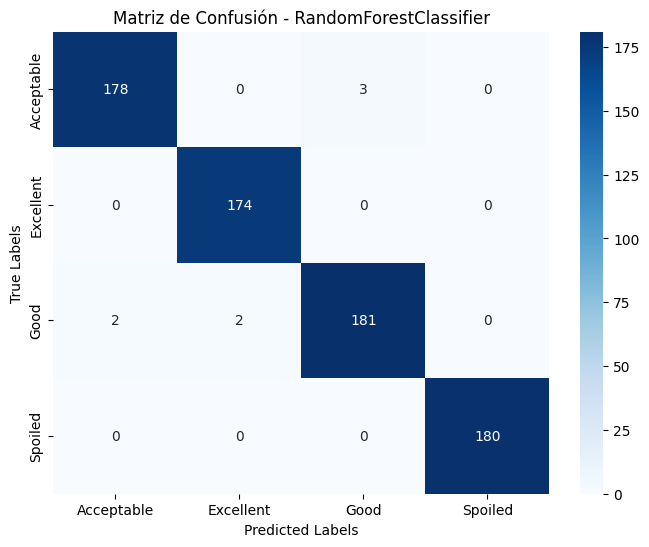

In [ ]:
k_best = SelectKBest(score_func=f_classif, k=3)
X = df.select_dtypes(include=['number'])
y = df['Label']
X_new = k_best.fit_transform(X,y)
# Obtener la máscara booleana de las características seleccionadas
selected_features_mask = k_best.get_support()

# Mostrar la máscara booleana
print("Máscara booleana de las características seleccionadas:", selected_features_mask)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

El selectKbest con la función f_classif me indica coger los gases MQ137,MQ138 y MQ5. Podemos observar que con esos gases da una gran predicción reduciendo numerablemente la cantidad de sensores por lo que es coherente mantenerla. Además los pocos errores que comete en esta prueba no son errores completamente dramáticos pues la carne como tal sigue estando en estado comestible.

Procedo a escalar los datos que no debería afectar demasiado en los resultados (no lo hace pero para brevedad de ejercicio no voy a repetir el ejercicio sin escalar los datos pues los resultados son similares) en este caso pero si en la eficiencia a la hora de entrenar el modelo

In [ ]:
#X_not_scaled=df2.select_dtypes(include=['number'])
X_not_scaled = X_new
se= StandardScaler()
X_scaled= se.fit_transform(X_not_scaled)

##Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.

###División del dataset
Primero realizamos una división de datos del dataset en datos en 2:

- Conjunto de entrenamiento (X_train, y_train): Se utiliza para entrenar el modelo.

- Conjunto de prueba (X_test, y_test): Se utiliza para evaluar el rendimiento del modelo en datos no vistos.

Esta división es fundamental para:

- Evitar el sobreajuste (overfitting): Asegurar que el modelo generalice bien a datos no vistos.

- Proporcionar una evaluación justa y realista del rendimiento del modelo.

In [ ]:
from IPython.display import Image

# URL de la imagen
image_url = 'https://learningds.org/_images/TrainTestDiagram.png'

# Crear y mostrar la imagen
Image(url=image_url)

Internamente, la función train_test_split realiza los siguientes pasos:

- Mezcla los datos:

    Los datos se mezclan aleatoriamente para evitar sesgos en la división. Esto es especialmente importante si los datos están ordenados o agrupados de alguna manera.

- Divide los datos:

    Según el valor de test_size, se separa el 30% de las muestras para el conjunto de prueba y el 70% para el conjunto de entrenamiento.

    La división se realiza de manera estratificada si se especifica el parámetro stratify (es una herramienta para garantizar que la división de los datos en conjuntos de entrenamiento y prueba mantenga la proporción de clases del dataset original), en este caso se usa.

- Devuelve los subconjuntos:

    La función devuelve cuatro arrays:

    - X_train: Características del conjunto de entrenamiento.

    - X_test: Características del conjunto de prueba.

    - y_train: Etiquetas del conjunto de entrenamiento.

    - y_test: Etiquetas del conjunto de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,stratify=y, random_state=123)
#X_scaled características con las que clasificamos
#y clasificación
#test_size porcentaje de datos para testear
#random_state= semilla

Para realizar todo lo pedido en la práctica de manera más eficar y sin repetir tanto código cree la siguiente función:

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, cv=10, scoring='f1_weighted'):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    #X_train Conjunto de datos de entrenamiento
    #y_train Conjunto de clasificaciones de los datos de entrenamiento

    # Validación cruzada con múltiples métricas
    #Métricas explicadas en apartado de métricas
    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision_weighted': 'precision_weighted',
        'recall_weighted': 'recall_weighted',
        'f1_weighted': 'f1_weighted'
    }

    #Resultados de validación cruzada
    validation_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=True
    )
    #model Modelo al cual se le realiza la validación cruzada
    #cv Especifica la estrategia de validación cruzada puede ser un entero, es el número de folds (pliegues) en la validación cruzada.
    ##También puede introducirse un objeto de tipo KFold, StratifiedKFold
    #scoring Métrica usada para la validacion cruzada
    #return_train_score Devolver los score del entrenamiento
    #X_train Conjunto de datos de entrenamiento
    #y_train Conjunto de clasificaciones de los datos de entrenamiento

    # Predicción en conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de evaluación en conjunto de entrenamiento
    #Calculamos las distintas métricas explicadas más abajo en el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Métricas de evaluación en conjunto de prueba
    #Calculamos las distintas métricas explicadas más abajo en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Matriz de confusión para conjunto de prueba
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Resultados de validación cruzada
    print("Resultados de Validación Cruzada:")
    for metric in scoring_metrics:
        print(f" - {metric.capitalize()}:")
        print(f"   - Train: {np.mean(validation_results[f'train_{metric}']):.4f}")
        print(f"   - Test: {np.mean(validation_results[f'test_{metric}']):.4f}")

    # Resultados en conjunto de entrenamiento y prueba
    print("\nResultados en Conjunto de Entrenamiento:")
    print(f" - Accuracy: {train_accuracy:.4f}")
    print(f" - Precision: {train_precision:.4f}")
    print(f" - Recall: {train_recall:.4f}")
    print(f" - F1 Score: {train_f1:.4f}")

    print("\nResultados en Conjunto de Prueba:")
    print(f" - Accuracy: {test_accuracy:.4f}")
    print(f" - Precision: {test_precision:.4f}")
    print(f" - Recall: {test_recall:.4f}")
    print(f" - F1 Score: {test_f1:.4f}")

    # Tiempos de entrenamiento y evaluación
    print("\nTiempos:")
    print(f" - Mean Training Time: {np.mean(validation_results['fit_time']):.4f} seconds")
    print(f" - Mean Scoring Time: {np.mean(validation_results['score_time']):.4f} seconds")

    # Visualización de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión - {model.__class__.__name__}')
    plt.show()

En ella se realiza tanto el entrenamiento como la validación veamoslo

###Entrenamiento
Se realiza en esta línea  
   
      model.fit(X_train, y_train)

La cual llama a la función fit del modelo que se encargará de entrenarlo con el conjunto de datos de entrenamiento.

##Función fit
###**Realiza una serie de verificaciones sobre los datos de entrada (X e y):**

1-Comprueba que X e y tengan la misma longitud (número de muestras).

2-Verifica que los datos no contengan valores NaN o infinitos (a menos que el modelo lo permita).

3-Convierte los datos a un formato compatible (por ejemplo, convierte DataFrames de pandas a arrays de NumPy).

###**Preprocesamiento interno**
Algunos modelos realizan preprocesamiento automático de los datos antes de entrenar. Por ejemplo:

-Los modelos basados en árboles (como RandomForestClassifier) no necesitan escalar los datos, pero otros modelos como SVM o regresiones lineales sí lo hacen.

-Algunos modelos codifican automáticamente variables categóricas o manejan valores faltantes.

###**Ajuste del modelo (entrenamiento)**
Aquí es donde ocurre la "magia". Dependiendo del tipo de modelo, el proceso de entrenamiento varía:

-Modelos basados en árboles (Random Forest, Decision Trees):
Se construyen múltiples árboles de decisión (en el caso de Random Forest).

Para cada árbol, se seleccionan subconjuntos aleatorios de datos (muestreo con reemplazo, también conocido como bagging).

En cada nodo del árbol, se selecciona la mejor característica para dividir los datos según un criterio (por ejemplo, la ganancia de información o el índice Gini).

-Modelos lineales (Regresión Lineal, Logistic Regression):
Se calculan los coeficientes (pesos) que minimizan una función de pérdida (por ejemplo, el error cuadrático medio en regresión lineal).

Esto se hace mediante optimización (por ejemplo, descenso de gradiente).

-Modelos de redes neuronales:
Se ajustan los pesos de la red mediante propagación hacia adelante (forward propagation) y retropropagación (backpropagation).

Se minimiza una función de pérdida utilizando un optimizador (por ejemplo SGD).

###**Almacenamiento de los parámetros aprendidos**
Una vez que el modelo ha sido entrenado, los parámetros aprendidos se almacenan en el objeto del modelo. Por ejemplo:

-En una regresión lineal, se almacenan los coeficientes (coef_) y el término de intercepción (intercept_).

-En un Random Forest, se almacenan los árboles de decisión entrenados.

Estos parámetros permiten que el modelo haga predicciones sobre nuevos datos.


###Validación
Para la validación esta esta línea de código la cual realiza una validación cruzada de 10 folds con diversas métricas

    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision_weighted': 'precision_weighted',
        'recall_weighted': 'recall_weighted',
        'f1_weighted': 'f1_weighted'
    }

    validation_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=True
    )

##Funcionamiento interno de cross_validate
###**Paso 1: División de los datos**
cross_validate divide los datos (X_train e y_train) en k folds (pliegues) según la estrategia especificada en cv.

###**Paso 2: Entrenamiento y evaluación**
Para cada fold:

  - Entrenamiento:

  Se entrena el modelo en k-1 folds (conjunto de entrenamiento).

  - Evaluación:

  Se evalúa el modelo en el fold restante (conjunto de prueba).

  Si return_train_score=True, también se evalúa el modelo en los k-1 folds de entrenamiento.

  - Cálculo de métricas:

  Se calculan las métricas especificadas en scoring para el conjunto de prueba y, opcionalmente, para el conjunto de entrenamiento.

###**Paso 3: Almacenamiento de resultados**
Los resultados de cada fold se almacenan en un diccionario:

- test_metric: Array con las métricas de evaluación en el conjunto de prueba para cada fold.

- train_metric: Array con las métricas de evaluación en el conjunto de entrenamiento para cada fold (solo si return_train_score=True).

- fit_time: Array con los tiempos de entrenamiento para cada fold.

- score_time: Array con los tiempos de evaluación para cada fold.

###**Resultados de cross_validate en este caso**
El diccionario validation_results contendrá los siguientes campos:

####Métricas de evaluación:
- test_accuracy: Array con la exactitud en el conjunto de prueba para cada fold.

- test_precision_weighted: Array con la precisión ponderada en el conjunto de prueba para cada fold.

- test_recall_weighted: Array con el recall ponderado en el conjunto de prueba para cada fold.

- test_f1_weighted: Array con el F1-score ponderado en el conjunto de prueba para cada fold.

####Métricas de entrenamiento (si return_train_score=True):
- train_accuracy: Array con la exactitud en el conjunto de entrenamiento para cada fold.

- train_precision_weighted: Array con la precisión ponderada en el conjunto de entrenamiento para cada fold.

- train_recall_weighted: Array con el recall ponderado en el conjunto de entrenamiento para cada fold.

- train_f1_weighted: Array con el F1-score ponderado en el conjunto de entrenamiento para cada fold.

####Tiempos:
- fit_time: Array con los tiempos de entrenamiento para cada fold.

- score_time: Array con los tiempos de evaluación para cada fold.


La validación cruzada es útil para evaluar el rendimiento del modelo en términos de precisión, recall, F1-score y exactitud sobre un conjunto de datos
más límitado.

Comparar el rendimiento en entrenamiento y prueba para detectar overfitting.

Analizar los tiempos de entrenamiento y evaluación.

In [ ]:
from IPython.display import Image

# URL de la imagen
image_url = 'https://www.researchgate.net/publication/343837646/figure/fig18/AS:963457595752460@1606717599292/Example-of-a-5-fold-cross-validation.png'

# Crear y mostrar la imagen
Image(url=image_url)

### Métricas usadas

En este trabajo se han utilizado las siguientes métricas trabajo con weighted es decir con versiones ponderadas de las metricas por ejemplo el F1 weighted es una versión ponderada del F1 Score usada para problemas con más de dos clases. Calcula el F1 Score para cada clase individualmente y luego toma un promedio ponderado de estos valores, donde el peso de cada clase es el número de muestras de esa clase en el dataset.

     - TP: Verdaderos Positivos
     - TN: Verdaderos Negativos
     - FP: Falsos Positivos
     - FN: Falsos Negativos

1. **Accuracy (Precisión):** Representa la proporción de predicciones correctas sobre el total de predicciones. Se calcula como:

  Accuracy = (TP + TN) / (TP + TN + FP + FN)


2. **Precision:** Indica la proporción de predicciones positivas correctas sobre el total de predicciones positivas. Se calcula como:

  Precision = TP / (TP + FP)

3. **Recall (Sensibilidad):** Representa la proporción de positivos reales identificados correctamente sobre el total de positivos reales. Se calcula como:

  Recall = TP / (TP + FN)

4. **F1 Score:** Es la media armónica entre Precision y Recall, proporcionando un balance entre ambas métricas. Se calcula como:

  F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

5. **Matriz de Confusión:** Es una tabla que muestra la distribución de las predicciones correctas e incorrectas por clase, permitiendo visualizar el rendimiento del modelo en cada categoría.

##Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema

Para resolver el problema voy a usar los siguientes tres modelos: RandomForestClassifier (ensemble),SVC y LogisticRegression

###RandomForestClassifier

El RandomForestClassifier es un algoritmo de aprendizaje automático basado en árboles de decisión que pertenece a la familia de los ensemble methods. Funciona combinando múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.


---

###¿Qué es un árbol de decisión?
Es un modelo predictivo que divide los datos en subconjuntos mediante una serie de preguntas (reglas if-else) hasta llegar a una predicción. Su estructura se asemeja a un árbol invertido:

    Nodo raíz: La primera pregunta/condición sobre los datos.

    Nodos internos: Preguntas intermedias que dividen los datos.

    Hojas (nodos terminales): La predicción final (clase o valor numérico).

####Funcionamiento
  1. División recursiva de los datos
El árbol decide cómo dividir los datos en cada paso buscando la mejor separación posible según un criterio de selección
  2. Criterios de división

- Clasificación:

      Índice de Gini: Mide la impureza (0 = todos iguales, 1 = mezcla máxima).
        

         Entropía: Mide el desorden (0 = puro, mayor valor = más incertidumbre).

- Regresión:

        Reducción de varianza: Divide para minimizar la varianza en los subgrupos.

- **Índice de Gini**: `Gini = 1 - Σ (p_i)^2`  
  (donde `p_i` = proporción de la clase `i`).
- **Entropía**: `Entropía = -Σ p_i * log2(p_i)`.
- **MSE**: `MSE = (1/n) * Σ (y_i - ȳ)^2`.

3. Parada (stopping criteria)
El árbol deja de crecer cuando:

- Todos los datos en un nodo son de la misma clase.

- Se alcanza una profundidad máxima predefinida.

- El número de muestras en un nodo es menor que un mínimo establecido.

####Ventajas
- Fácil de entender e interpretar (visualmente claro).
- No requiere normalización de datos.
- Funciona con datos numéricos y categórico

####Desventajas
- Propenso a overfitting (puede memorizar los datos en lugar de generalizar).
- Inestable (pequeños cambios en los datos pueden cambiar mucho el árbol).
- Sesgo hacia variables dominantes si no están balanceadas.

####Decisión de por qué ensemble
Para evitar el overfitting están las siguientes opciones:

- Podado (pruning): Eliminar ramas poco importantes.

- Limitar la profundidad máxima (max_depth).

- Mínimo de muestras por hoja (min_samples_leaf).

- Usar ensembles
---

### Funcionamiento
Bootstraping (Bagging): Se generan varios subconjuntos de datos de entrenamiento mediante muestreo con reemplazo.

Entrenamiento de árboles: Se construyen múltiples árboles de decisión de forma independiente en cada subconjunto de datos.

Selección aleatoria de características: En cada división de un nodo, se selecciona un subconjunto aleatorio de características en lugar de considerar todas.

Votación: Para la clasificación, cada árbol emite un voto y la clase final se elige por mayoría.

---

###Ventajas
Reducción del sobreajuste: Al combinar múltiples árboles, se evita que el modelo aprenda demasiado los datos de entrenamiento.

Mayor precisión: En general, tiene mejor desempeño que un solo árbol de decisión.

Manejo de datos faltantes: Puede funcionar bien incluso con valores faltantes en el conjunto de datos.

Menos sensible a datos ruidosos: Debido a la votación de múltiples árboles, se reduce el impacto de anomalías.

Manejo de grandes volúmenes de datos: Puede procesar conjuntos de datos grandes y con muchas características.

Importancia de características: Permite evaluar la relevancia de cada variable en la predicción.

---

###Inconvenientes
Mayor consumo computacional: Requiere más memoria y tiempo de procesamiento que un solo árbol de decisión.

Menos interpretable: A diferencia de un solo árbol de decisión, es más difícil visualizar y entender.

No apto para datos escasos: Si hay pocos datos, puede no generalizar bien.

No es ideal para problemas en línea o en tiempo real: Debido a su complejidad, puede no ser adecuado para aplicaciones con restricciones de tiempo.

In [ ]:
from IPython.display import Image

# URL de la imagen
image_url = 'https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg'

# Crear y mostrar la imagen
Image(url=image_url)

RandomForestClassifier es una excelente opción cuando se necesita un modelo robusto y preciso sin preocuparse demasiado por la interpretabilidad.

###SVC

El Support Vector Classifier (SVC) es un algoritmo de clasificación basado en máquinas de soporte vectorial (SVM). Su objetivo es encontrar el hiperplano óptimo que mejor separa las clases en un espacio de características.

---

###Funcionamiento

Definir un hiperplano de separación: Encuentra un hiperplano que divida los datos en diferentes clases con el mayor margen posible entre ellos.

Uso de soporte vectorial: Solo los puntos más cercanos al hiperplano (vectores soporte) influyen en su posición.

Manejo de datos no linealmente separables: Si los datos no son separables linealmente, se usa un truco del núcleo (kernel trick) para proyectarlos a un espacio de mayor dimensión donde sí puedan ser separados.

Margen suave: Usa un parámetro de regularización
C que controla el equilibrio entre maximizar el margen y permitir ciertos errores en la clasificación.

---
###Función de Pérdida en Máquinas de Vectores de Soporte (SVC)
Definición:

La función de pérdida en SVC combina:

    Pérdida Hinge (para maximizar el margen).

    Regularización L2 (para evitar sobreajuste).

Fórmula General
$$
L(\mathbf{w}, b) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

- w	Vector de pesos del hiperplano.
- b	Término de sesgo (bias).
- yi Etiqueta de clase (+1 o -1).
- xi Vector de características de la muestra i.
- C	Parámetro de regularización (controla equilibrio entre margen y errores).

2. Componentes Clave
- Pérdida Hinge
$$
\text{Hinge Loss} = \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

    Caso 1: Si yi(w⋅xi+b)≥1

        Muestra bien clasificada fuera del margen → Pérdida = 0.

    Caso 2: Si yi(w⋅xi+b)<1

        Muestra dentro del margen o mal clasificada → Pérdida > 0.

- Regularización L2
$$
\text{Regularización} = \frac{1}{2} \|\mathbf{w}\|^2
$$

    Penaliza pesos grandes para simplificar el modelo.

    Evita sobreajuste (overfitting)

---

###Ventajas
- Eficiente en espacios de alta dimensión: Funciona bien con conjuntos de datos donde el número de características es alto en comparación con el número de muestras.

- Buen rendimiento con datos no lineales: Gracias a los kernels (lineal, polinómico, RBF, etc.), puede manejar relaciones complejas entre variables.

- Robusto contra el sobreajuste: Si se eligen bien los hiperparámetros, puede generalizar bien incluso con pocos datos.

- Buena precisión en clasificación binaria: Es especialmente efectivo en problemas de clasificación de dos clases bien separadas.

---

### Inconvenientes
- Lento en grandes volúmenes de datos: La complejidad de entrenamiento es alta
(O(n2) o peor), lo que lo hace ineficiente para conjuntos de datos muy grandes.

- Difícil de interpretar: No proporciona directamente la importancia de las características como otros modelos (ej. Random Forest).

- Sensibilidad a la elección del kernel y los hiperparámetros: Es necesario ajustar correctamente el kernel y parámetros como C y gamma para obtener buenos resultados.

- No maneja bien datos ruidosos o solapados: Si las clases no son separables de forma clara, puede no funcionar bien sin un ajuste fino.

In [ ]:
# URL de la imagen
image_url = 'https://vitalflux.com/wp-content/uploads/2022/05/support-vector-machine-classifier-300x290.png'

# Crear y mostrar la imagen
Image(url=image_url)

En resumen, SVC es un modelo poderoso y preciso para problemas de clasificación, pero puede volverse computacionalmente costoso en conjuntos de datos grandes y requiere una buena selección de hiperparámetros.

###LogisticRegression

El LogisticRegression es un algoritmo de clasificación basado en la regresión logística, que modela la probabilidad de pertenencia a una clase utilizando la función sigmoide. Es un modelo lineal ampliamente utilizado en clasificación binaria y, con algunas modificaciones, en clasificación multiclase

---

###Funcionamiento
Cálculo de la combinación lineal de características:
$$
z = \mathbf{w}^T \mathbf{x} + b
$$

donde:
- $\mathbf{w} = [w_1, w_2, \dots, w_n]^T$ es el vector de pesos,
- $\mathbf{x} = [x_1, x_2, \dots, x_n]^T$ es el vector de características,
- $b$ es el término de sesgo (bias)

Aplicación de la función sigmoide

La función sigmoide convierte el valor lineal $z$ en una probabilidad entre 0 y 1:

$$
P(y=1) = \frac{1}{1 + e^{-z}}
$$

donde:
- $z = \mathbf{w}^T \mathbf{x} + b$ es la combinación lineal de las características
- $e$ es la base del logaritmo natural (≈ 2.71828)
- $P(y=1)$ representa la probabilidad de que la clase sea 1

Características clave:
1. **Rango de salida**: (0, 1)
2. **Interpretación**:
   - $P(y=1) > 0.5$ → Predicción clase 1
   - $P(y=1) < 0.5$ → Predicción clase 0
3. **Forma de S**: Suave y diferenciable en todos los puntos

Criterio de decisión: Si la probabilidad es mayor que un umbral (por defecto 0.5), la instancia se clasifica como 1, de lo contrario como 0.

Optimización de los parámetros w y b :Se usa la maximización de la verosimilitud o el descenso de gradiente para minimizar la función de pérdida (log-loss).

---

###Log-loss
Métrica (función de pérdida) común en problemas de clasificación binaria o multiclase, que mide qué tan bien un modelo predice probabilidades calibradas. Su fórmula es:
- Para clasificación binaria:

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

    - N : Número de muestras.  
    - y_i: Etiqueta real (0 o 1).  
    - hat{y}_i: Probabilidad predicha de pertenecer a la clase 1.

- Para clasificación multiclase:

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
$$

      - N: Número de muestras.  
      - C: Número de clases.  
      - y_{i,c}: 1 si la muestra i es de la clase c, 0 en otro caso.  
      - hat{y}_{i,c}: Probabilidad predicha de que la muestra i pertenezca a la clase c.  

**Nota**:  
Las probabilidades hat{y}_{i,c} deben sumar 1 para cada muestra.


---

###Ventajas
- Modelo simple y eficiente: Fácil de entrenar y rápido en inferencia.  
- Interpretable: Los coeficientes w indican la importancia de cada variable en la predicción.  
- Escalable: Funciona bien con conjuntos de datos grandes.  
- Robusto frente al sobreajuste: Se puede regularizar fácilmente con **L1 (Lasso) o L2 (Ridge)**.  
- Extensible a múltiples clases: Puede generalizarse a clasificación multiclase con **One-vs-Rest (OvR)** o **Softmax (Multinomial)**.  

---

###Inconvenientes
- Solo modela relaciones lineales: No es adecuado si las clases no son separables linealmente sin una transformación previa de los datos.  
- Sensibilidad a datos desbalanceados: Puede generar predicciones sesgadas si una clase domina los datos.  
- No captura relaciones complejas: Modelos más avanzados como Random Forest o SVM pueden superar su rendimiento en datos no lineales.  
- Requiere normalización de datos: El rendimiento mejora si las características están escaladas (ej. con StandardScaler).

In [ ]:
# URL de la imagen
image_url = 'https://savioglobal.com/wp-content/uploads/2023/02/logistic-regression.png.webp'

# Crear y mostrar la imagen
Image(url=image_url)

En resumen, LogisticRegression es un modelo ideal para problemas de clasificación binaria simples, especialmente cuando se busca interpretabilidad y eficiencia. Sin embargo, en problemas más complejos con relaciones no lineales, otros modelos pueden ser más adecuados.

##Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar)

Los hiperparámetros son parámetros que no se aprenden directamente de los datos, sino que deben establecerse antes del proceso de entrenamiento de un modelo. Estos afectan el rendimiento y la capacidad de generalización del modelo.

Los hiperparámetros se utilizan para:

- Controlar la complejidad del modelo: Evitar sobreajuste (overfitting) o subajuste (underfitting).
    
- Optimizar el desempeño del modelo: Ajustar hiperparámetros permite mejorar métricas como precisión, recall o F1-score.
    
- Acelerar el proceso de entrenamiento: Algunos hiperparámetros impactan el tiempo y el uso de recursos computacionales.

Su propósito es encontrar la mejor configuración posible para un modelo.

En este caso para buscar los valores de los hiperparámetros voy a utilizar RandomizedSearchCV  que es una técnica de optimización de hiperparámetros que selecciona combinaciones aleatorias de hiperparámetros para entrenar y evaluar un modelo.

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'linear']
}

#C =	Parámetro de regularización. Controla la penalización por errores de clasificación.
##Un valor más alto hace que el modelo sea más complejo y menos tolerante a errores.
#gamma = Define la influencia de cada punto de entrenamiento en la decisión.
##Valores bajos (0.001, 0.01) generan una separación más suave, mientras que valores altos (0.1) crean fronteras más complejas.
##'scale' y 'auto' ajustan automáticamente gamma según los datos.
#kernel	Define la función del núcleo (kernel) que transforma los datos en un espacio de mayor dimensión.
# 'rbf' es el más común, 'poly' usa polinomios y 'linear' aplica una separación lineal

skf = StratifiedKFold(n_splits=10)

#Es una variante de la validación cruzada que divide los datos en K particiones (folds),
#asegurando que la proporción de clases en cada fold sea la misma que en el conjunto de datos original.
#Divide los datos en K subconjuntos (folds).
#En cada iteración, usa K-1 folds para entrenar y el fold restante para evaluar.
#Repite este proceso K veces, usando un fold diferente para evaluación cada vez.
#Se asegura de que cada fold tenga una distribución de clases similar al conjunto de datos original.


random_search = RandomizedSearchCV(SVC(), param_grid, cv=skf, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)

#SVC()	Modelo de Support Vector Machine (SVM) al que se le optimizarán los hiperparámetros.
#param_grid	Diccionario con los hiperparámetros a probar (C, gamma, kernel).
#cv=skf	Usa StratifiedKFold(n_splits=10) para hacer validación cruzada.
#scoring='accuracy'	Usa la precisión (accuracy) como métrica de evaluación.
#n_iter=10	Prueba 10 combinaciones aleatorias de hiperparámetros en lugar de todas las combinaciones posibles.
#n_jobs=-1	Usa todos los núcleos del procesador para acelerar la búsqueda.
#random_state=42	Fija la semilla para que los resultados sean reproducibles.

random_search.fit(X_train, y_train)
best_svm_params = random_search.best_params_
print("Mejores hiperparámetros para SVM:", best_svm_params)

Mejores hiperparámetros para SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}


Mini explicación de rbf:

Función matemática utilizada para transformar datos no lineales en un espacio dimensional más alto donde sí sean linealmente separables.

Fórmula Matemática:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left( -\gamma \, \|\mathbf{x}_i - \mathbf{x}_j\|^2 \right)
$$

- K(xi,xj): Valor del kernel entre los puntos xi y xj.
- Gamma:
  - Controla el "radio de influencia" de cada punto.
  - Relación:
  $$
  \gamma = \frac{1}{2\sigma^2}
  $$
  
    (donde sigma es el ancho del kernel).
  - **Alto \(gamma\)**: Decisión muy local (riesgo de *overfitting*).
  - **Bajo \(gamma\)**: Influencia más amplia (modelo más suave).

Distancia euclidiana al cuadrado entre los vectores.
  
$$
|\mathbf{x}_i - \mathbf{x}_j\|^2
$$

In [ ]:
rf_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
#El Random Forest Classifier al ser un modelo basado en árboles de decisión no requiere regularización explícita.
# n_estimators = Número de árboles en el bosque del modelo Random Forest.
## Un valor más alto puede mejorar la precisión, pero también aumenta el tiempo de entrenamiento.
# max_depth = Profundidad máxima de cada árbol en el bosque.
## Un valor mayor permite que los árboles sean más complejos, capturando más patrones, pero también puede causar sobreajuste.
## Si se establece en None, los nodos se expanden hasta que todas las hojas contienen menos de min_samples_split muestras.

skf = StratifiedKFold(n_splits=10)

random_search = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=skf, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)
best_rf_params = random_search.best_params_
print("Mejores hiperparámetros para SVM:", best_rf_params)

Mejores hiperparámetros para SVM: {'n_estimators': 200, 'max_depth': 30}


In [ ]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000, 100000]}

# C = Parámetro de regularización inversa. Controla la penalización por errores en la regresión logística.
## Valores más pequeños (0.001, 0.01) aplican una regularización más fuerte, evitando sobreajuste.
## Valores más grandes (10, 100) permiten mayor flexibilidad al modelo, pero pueden llevar a sobreajuste.

# max_iter = Número máximo de iteraciones en el algoritmo de optimización.
## Si el modelo no converge (no encuentra los coeficientes óptimos), se puede aumentar este valor.
## Valores más altos (10000, 100000) permiten más iteraciones para problemas complejos.

skf = StratifiedKFold(n_splits=10)

random_search = RandomizedSearchCV(LogisticRegression(), lr_params, cv=skf, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)
best_lr_params = random_search.best_params_
print("Mejores hiperparámetros para LogisticRegression:", best_lr_params)

Mejores hiperparámetros para LogisticRegression: {'max_iter': 100, 'C': 0.001}


##Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

Para el entrenamiento y estimación de errores usaremos la función ya previamente explicada.

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, cv=10, scoring='f1_weighted'):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Validación cruzada con múltiples métricas
    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision_weighted': 'precision_weighted',
        'recall_weighted': 'recall_weighted',
        'f1_weighted': 'f1_weighted'
    }
    validation_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=True
    )

    # Predicción en conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de evaluación en conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Métricas de evaluación en conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Matriz de confusión para conjunto de prueba
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Resultados de validación cruzada
    print("Resultados de Validación Cruzada:")
    for metric in scoring_metrics:
        print(f" - {metric.capitalize()}:")
        print(f"   - Train: {np.mean(validation_results[f'train_{metric}']):.4f}")
        print(f"   - Test: {np.mean(validation_results[f'test_{metric}']):.4f}")

    # Resultados en conjunto de entrenamiento y prueba
    print("\nResultados en Conjunto de Entrenamiento:")
    print(f" - Accuracy: {train_accuracy:.4f}")
    print(f" - Precision: {train_precision:.4f}")
    print(f" - Recall: {train_recall:.4f}")
    print(f" - F1 Score: {train_f1:.4f}")

    print("\nResultados en Conjunto de Prueba:")
    print(f" - Accuracy: {test_accuracy:.4f}")
    print(f" - Precision: {test_precision:.4f}")
    print(f" - Recall: {test_recall:.4f}")
    print(f" - F1 Score: {test_f1:.4f}")

    # Tiempos de entrenamiento y evaluación
    print("\nTiempos:")
    print(f" - Mean Training Time: {np.mean(validation_results['fit_time']):.4f} seconds")
    print(f" - Mean Scoring Time: {np.mean(validation_results['score_time']):.4f} seconds")

    # Visualización de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión - {model.__class__.__name__}')
    plt.show()

###Introducción
Primero en todos los modelos veremos el resultado de entrenar sin ajustar los hiperparámetros y después ajustandolos, viendo así que hay en general una mejora cuando se ajustan estos.

Acto seguido discutiremos los resultados

##SVC

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.9148
   - Test: 0.9119
 - Precision_weighted:
   - Train: 0.9192
   - Test: 0.9174
 - Recall_weighted:
   - Train: 0.9148
   - Test: 0.9119
 - F1_weighted:
   - Train: 0.9134
   - Test: 0.9104

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.9208
 - Precision: 0.9237
 - Recall: 0.9208
 - F1 Score: 0.9198

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9236
 - Precision: 0.9279
 - Recall: 0.9236
 - F1 Score: 0.9228

Tiempos:
 - Mean Training Time: 0.0288 seconds
 - Mean Scoring Time: 0.0149 seconds


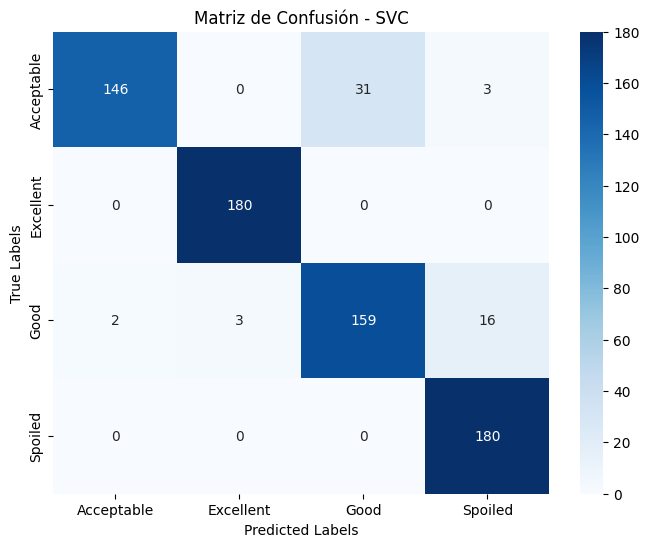

In [ ]:
#PRIMERO SIN AJUSTAR HIPERPARAMETROS
##PRIMERA APROXIMACION
svc = SVC()
train_and_evaluate_model(svc, X_train, y_train, X_test, y_test,10,'accuracy')

Podemos observar que predice de manera muy acertada solo tomando 3 sensores en lugar de tomando todos llegando a un 92.36% de accuracy lo cual es un porcentaje bastante aceptable para el problema que se esta tratando.
Veamos ajustando hiperparametros:

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.9749
   - Test: 0.9726
 - Precision_weighted:
   - Train: 0.9767
   - Test: 0.9747
 - Recall_weighted:
   - Train: 0.9749
   - Test: 0.9726
 - F1_weighted:
   - Train: 0.9749
   - Test: 0.9725

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.9756
 - Precision: 0.9773
 - Recall: 0.9756
 - F1 Score: 0.9755

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9722
 - Precision: 0.9742
 - Recall: 0.9722
 - F1 Score: 0.9721

Tiempos:
 - Mean Training Time: 0.0181 seconds
 - Mean Scoring Time: 0.0109 seconds


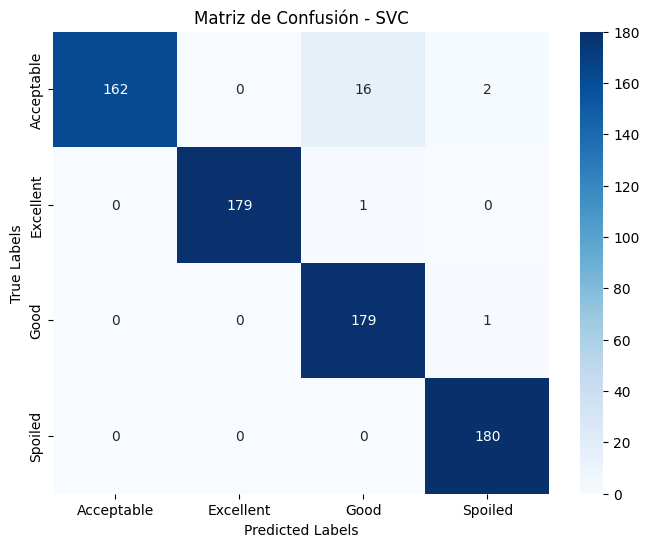

In [ ]:
#Datos aleatorios porque no se por qué lo anterior no va
svc_model = SVC(C=best_svm_params['C'] ,gamma=best_svm_params['gamma'] ,kernel=best_svm_params['kernel'] ,max_iter = 10000)

train_and_evaluate_model(svc_model, X_train, y_train, X_test, y_test,10,'accuracy')

Observamos un gran rendimiento pues tiene un 97% en accuracy con solo 3 sensores lo cual es muy positivo (las otras métricas no las comento pero en general en todos los modelos salen también parecidas al accuracy).

##RFC

Veamos ahora con el RFC, de este modelo espero que de grandes resultados, veamos si mis expectativas se cumplen.

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.9995
   - Test: 0.9887
 - Precision_weighted:
   - Train: 0.9995
   - Test: 0.9889
 - Recall_weighted:
   - Train: 0.9995
   - Test: 0.9887
 - F1_weighted:
   - Train: 0.9995
   - Test: 0.9887

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.9994
 - Precision: 0.9994
 - Recall: 0.9994
 - F1 Score: 0.9994

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9944
 - Precision: 0.9944
 - Recall: 0.9944
 - F1 Score: 0.9944

Tiempos:
 - Mean Training Time: 0.2150 seconds
 - Mean Scoring Time: 0.0182 seconds


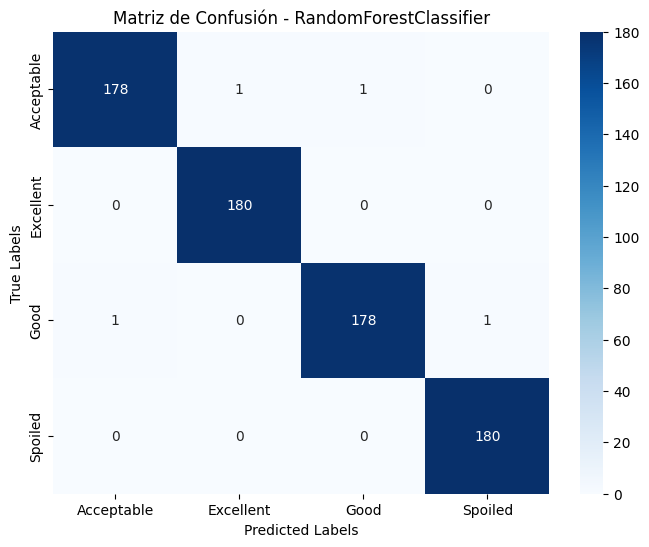

In [ ]:
#PRIMERO SIN AJUSTAR HIPERPARAMETROS
##PRIMERA APROXIMACION
rfc=RandomForestClassifier()
train_and_evaluate_model(rfc, X_train, y_train, X_test, y_test,10,'accuracy')

Podemos observar que predice de manera muy acertada solo tomando 3 sensores en lugar de tomando todos llegando a un 99% de accuracy lo cual es un porcentaje increible para el problema que se esta tratando.
Veamos ajustando hiperparametros:

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.9995
   - Test: 0.9899
 - Precision_weighted:
   - Train: 0.9995
   - Test: 0.9901
 - Recall_weighted:
   - Train: 0.9995
   - Test: 0.9899
 - F1_weighted:
   - Train: 0.9995
   - Test: 0.9899

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.9994
 - Precision: 0.9994
 - Recall: 0.9994
 - F1 Score: 0.9994

Resultados en Conjunto de Prueba:
 - Accuracy: 0.9931
 - Precision: 0.9931
 - Recall: 0.9931
 - F1 Score: 0.9931

Tiempos:
 - Mean Training Time: 0.4949 seconds
 - Mean Scoring Time: 0.0308 seconds


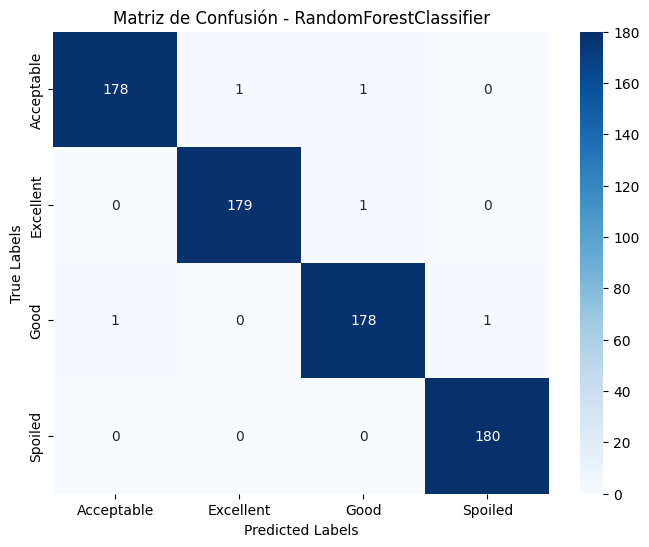

In [ ]:
rf_model = RandomForestClassifier(max_depth= best_rf_params['max_depth'], n_estimators= best_rf_params['n_estimators'])

train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test,10,'accuracy')

Vemos una ligera mejora ajustando los hiperparámetros

##LogisticRegression

Veamos ahora con el modelo de regresión logística.

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.7093
   - Test: 0.7012
 - Precision_weighted:
   - Train: 0.7059
   - Test: 0.6985
 - Recall_weighted:
   - Train: 0.7093
   - Test: 0.7012
 - F1_weighted:
   - Train: 0.7061
   - Test: 0.6966

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.7089
 - Precision: 0.7054
 - Recall: 0.7089
 - F1 Score: 0.7058

Resultados en Conjunto de Prueba:
 - Accuracy: 0.6944
 - Precision: 0.6909
 - Recall: 0.6944
 - F1 Score: 0.6899

Tiempos:
 - Mean Training Time: 0.0127 seconds
 - Mean Scoring Time: 0.0092 seconds


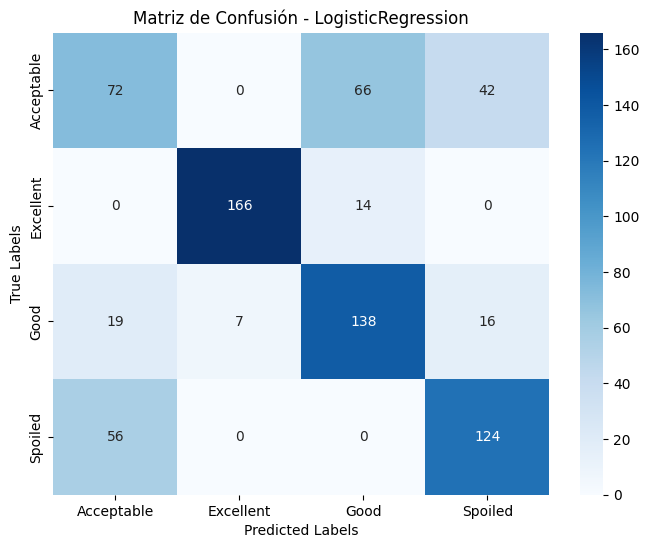

In [ ]:
#PRIMERO SIN AJUSTAR HIPERPARAMETROS
##PRIMERA APROXIMACION
lr=LogisticRegression()
train_and_evaluate_model(lr, X_train, y_train, X_test, y_test,10,'accuracy')

podemos observar que predice de manera muy poco acertada solo tomando 3 sensores en lugar de tomando todos llegando a un 69.44% de accuracy lo cual es un porcentaje bastante bajo para el problema que se esta tratando. Además los errores que se cometen son muy relevantes (muestras podridas se dan por buenas). Esto se debe a que no se observa una relación lineal clara luego el logistic debería funcionar peor que los otros dos modelos y así ocurre.
Veamos ajustando hiperparametros:

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.7243
   - Test: 0.7262
 - Precision_weighted:
   - Train: 0.7500
   - Test: 0.7519
 - Recall_weighted:
   - Train: 0.7243
   - Test: 0.7262
 - F1_weighted:
   - Train: 0.7061
   - Test: 0.7083

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.7304
 - Precision: 0.7557
 - Recall: 0.7304
 - F1 Score: 0.7147

Resultados en Conjunto de Prueba:
 - Accuracy: 0.7014
 - Precision: 0.7321
 - Recall: 0.7014
 - F1 Score: 0.6802

Tiempos:
 - Mean Training Time: 0.0077 seconds
 - Mean Scoring Time: 0.0089 seconds


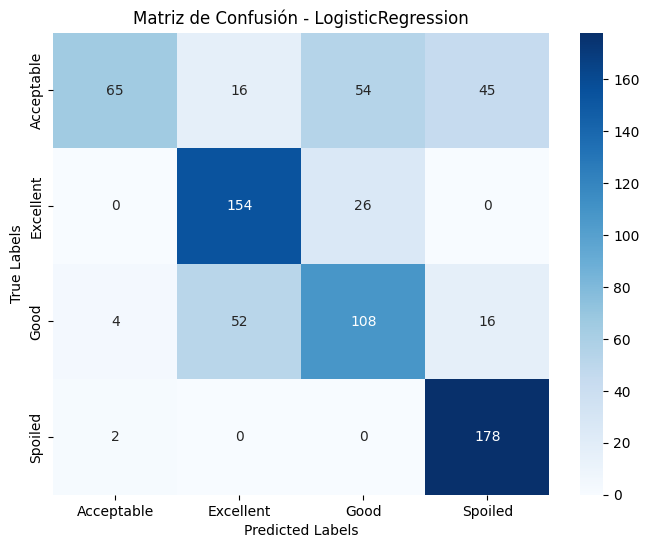

In [ ]:
lr_model = LogisticRegression(C=best_lr_params['C'],max_iter = best_lr_params['max_iter'])

train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test,10,'accuracy')

Podemos ver una ligera mejora en el accuracy pero no suficiente.
Probemos cogiendo todos los sensores y repitiendo el proceso y observemos los resultados.

In [ ]:
X_not_scaled=df.select_dtypes(include=['number'])
se= StandardScaler()
X_scaled= se.fit_transform(X_not_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.8173
   - Test: 0.8095
 - Precision_weighted:
   - Train: 0.8125
   - Test: 0.8052
 - Recall_weighted:
   - Train: 0.8173
   - Test: 0.8095
 - F1_weighted:
   - Train: 0.8143
   - Test: 0.8064

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.8167
 - Precision: 0.8121
 - Recall: 0.8167
 - F1 Score: 0.8138

Resultados en Conjunto de Prueba:
 - Accuracy: 0.8153
 - Precision: 0.8109
 - Recall: 0.8153
 - F1 Score: 0.8126

Tiempos:
 - Mean Training Time: 0.0294 seconds
 - Mean Scoring Time: 0.0093 seconds


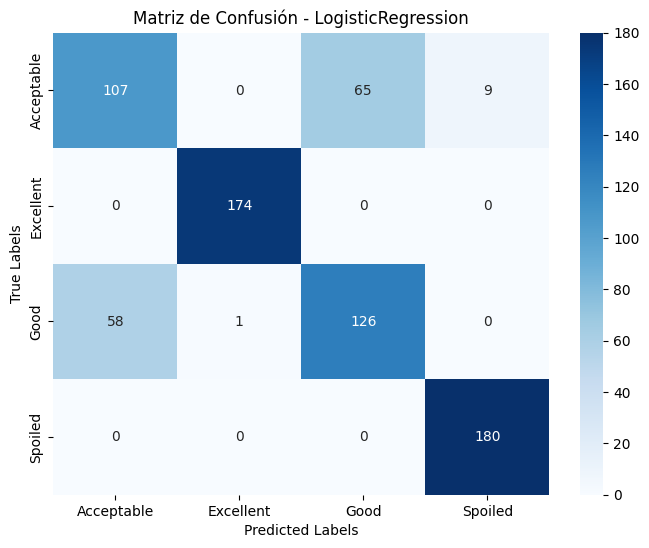

In [ ]:
lr=LogisticRegression()
train_and_evaluate_model(lr, X_train, y_train, X_test, y_test,10,'accuracy')

Mejores hiperparámetros para LogisticRegression: {'max_iter': 1000, 'C': 100}
Resultados de Validación Cruzada:
 - Accuracy:
   - Train: 0.8407
   - Test: 0.8387
 - Precision_weighted:
   - Train: 0.8407
   - Test: 0.8390
 - Recall_weighted:
   - Train: 0.8407
   - Test: 0.8387
 - F1_weighted:
   - Train: 0.8403
   - Test: 0.8382

Resultados en Conjunto de Entrenamiento:
 - Accuracy: 0.8405
 - Precision: 0.8405
 - Recall: 0.8405
 - F1 Score: 0.8401

Resultados en Conjunto de Prueba:
 - Accuracy: 0.8292
 - Precision: 0.8282
 - Recall: 0.8292
 - F1 Score: 0.8287

Tiempos:
 - Mean Training Time: 0.1057 seconds
 - Mean Scoring Time: 0.0093 seconds


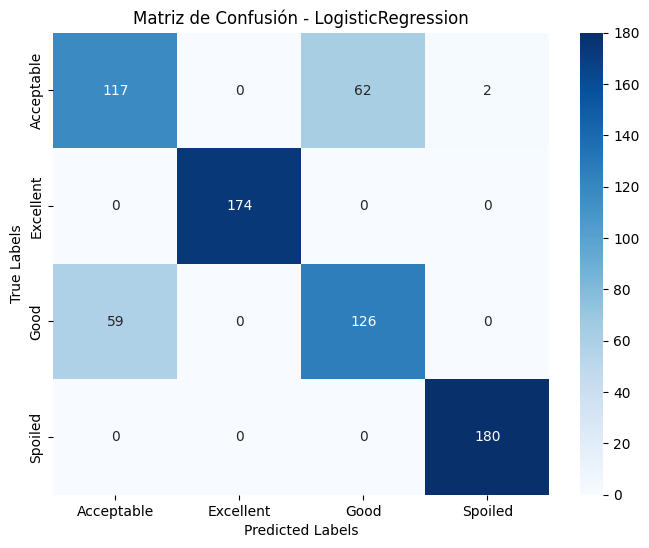

In [ ]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000, 100000]}
skf = StratifiedKFold(n_splits=10)
random_search = RandomizedSearchCV(LogisticRegression(), lr_params, cv=skf, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_lr_params = random_search.best_params_
print("Mejores hiperparámetros para LogisticRegression:", best_lr_params)
lr_model = LogisticRegression(C=best_lr_params['C'],max_iter = best_lr_params['max_iter'])

train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test,10,'accuracy')

Observamos que no supera el 85 por ciento, que aunque no es un mal porcentaje, no lo consideraría suficiente para el problema.

###Conclusiones
Como conclusión podemos decir que si queremos un **100% de acierto podriamos simplementer tomar todos los sensores** para el modelo y obtendriamos ese porcentaje de aciertos, sin embargo parece más **economicamente interesante reducir el número de sensores a 3** y usar un **modelo tipo RFC** ( que es el que da mejores resultados) o un modelo SVC para predecir. Esto aparte de ahorrar dinero no pierde apenas porcentaje de acierto pues es superior al 95 por ciento en ambos casos quedandonos así con los sensores de los gases que nos dio selectkbest (de hecho es 99% con RFC)

# **Ejercicio 2: Problema de regresión (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar **lenguas electrónicas** capaces de determinar el pH de una solución acuosa. El conjunto de datos se obteniene a partir de la investigación realizada en los siguientes artículos:

- S. Capel-Cuevas, M.P. Cuéllar, I. de Orbe-Payá, M.C. Pegalajar, L.F. Capitán-Vallvey, Full-range optical pH sensor array based on neural networks, Microchemical Journal, Volume 97, Issue 2, 2011, Pages 225-233, ISSN 0026-265X, <a href="https://doi.org/10.1016/j.microc.2010.09.008">https://doi.org/10.1016/j.microc.2010.09.008</a>.

- Capel-Cuevas S, López-Ruiz N, Martinez-Olmos A, Cuéllar MP, Pegalajar Mdel C, Palma AJ, de Orbe-Payá I, Capitán-Vallvey LF. A compact optical instrument with artificial neural network for pH determination. Sensors (Basel). 2012;12(5):6746-63. doi: 10.3390/s120506746. Epub 2012 May 22. PMID: 22778668; PMCID: PMC3386767 (URL: <a href="https://pubmed.ncbi.nlm.nih.gov/22778668/">https://pubmed.ncbi.nlm.nih.gov/22778668/</a>.




## Contexto y motivación del problema

El pH es una medida que indica la acidez o alcalinidad de una solución. Se mide en una escala que va de 0 a 14, donde un pH de 7 es considerado neutro, valores por debajo de 7 indican acidez y valores por encima de 7 indican alcalinidad.

Las utilidades del pH son bastante amplias. Algunas son:

1. **En la agricultura**: Conocer el pH del suelo es crucial para determinar qué cultivos pueden crecer mejor en esa tierra y para ajustar la fertilización.

2. **En química**: En laboratorios, el pH es fundamental para llevar a cabo reacciones químicas adecuadas, ya que muchas reacciones dependen de un pH específico.

3. **En medicina**: En el ámbito médico, el pH de la sangre y otros fluidos corporales puede ser un indicador importante de la salud de una persona.

4. **En el tratamiento de aguas**: El pH del agua es esencial para asegurar que sea segura para el consumo y para el tratamiento de aguas residuales.

5. **En cosmética**: En productos de cuidado personal, el pH puede afectar la eficacia y la seguridad de los productos en la piel.


Habitualmente, el análisis de pH de una disolución es un proceso que conlleva la toma de muestras de la solución en cuestión, su transporte a un laboratorio, el análisis con métodos específicos de tratamiento (pH-metros) y el informe final de análisis de pH.


Como alternativa, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **lenguas electrónicas** sensibles al pH de una disolución. Una lengua electrónica es un dispositivo o sistema que simula la capacidad del sentido del gusto y que se utiliza para analizar y evaluar diferentes líquidos, como alimentos y bebidas, mediante la detección de compuestos químicos.

<img src="https://pub.mdpi-res.com/biosensors/biosensors-08-00003/article_deploy/html/images/biosensors-08-00003-ag-550.jpg?1569758982" />

Estas *lenguas* funcionan a través de sensores que responden a diferentes sustancias químicas, generando un perfil de sabor que puede ser analizado y comparado. Son muy útiles en la industria alimentaria para controlar la calidad, desarrollar nuevos productos y realizar pruebas de sabor de manera objetiva. Además, las lenguas electrónicas pueden ser utilizadas en otras áreas, como el monitoreo ambiental y la detección de contaminantes. En resumen, son herramientas valiosas para obtener información sobre el sabor y la composición de líquidos de manera precisa y eficiente.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41378-024-00690-9/MediaObjects/41378_2024_690_Figa_HTML.png" />


## El conjunto de datos

El modelo de regresión a desarrollar en esta práctica **tendrá como entrada los valores de un array de sensores (*papilas gustativas*) localizado en una lengua electrónica sensible al pH, y deberá proporcionar como resultado el valor de pH de la solución acuosa que entre en contacto con dicha lengua electrónica**.

En total dispondremos de **12 sensores distintos** (*papilas gustativas* de distinto tipo), capaces de cambiar de color ante la presencia de pH de distinta magnitud. Estos sensores se imprimen químicamente sobre un soporte o tarjeta, la cual se entra en contacto con la disolución para capturar sus propiedades.  El diseño de la disposición de estos sensores es la mostrada en la siguiente figura:


<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr1.jpg" />
</center>

La reacción de cada sensor frente al pH produce un cambio de color en el mismo. Cada sensor se corresponde con un compuesto químico capaz de cambiar de color ante la detección de pH en un rango determinado. En concreto, el cambio se produce en la tonalidad o componente *Hue (H)* del espacio de color HSV (<a href="https://es.wikipedia.org/wiki/Modelo_de_color_HSV">https://es.wikipedia.org/wiki/Modelo_de_color_HSV</a>).


Cuando el array de sensores entra en contacto con una disolución, el valor de tonalidad color H del espacio HSV es capturado por el dispositivo electrónico (lengua electrónica) que se muestra en la siguiente figura, y es trasladado a un modelo de aprendizaje automático capaz de determinar el pH de la solución.

<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr3.jpg" />
</center>


El modelo de decisión para determinar el pH de la disolución a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de tonalidad (componente H del espacio de color HSV) de cada uno de los sensores.
- **Datos de salida (Y)**: Valor de pH de la disolución.


Se ha generado un conjunto de datos para la práctica accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [ ]:
import pandas as pd

path_to_data_regression= 'https://www.dropbox.com/scl/fi/3x7kovawtekmr20d8hd22/ElectronicTongue.csv?rlkey=7ewm92dgd09n32t576ah5kz36&st=hnabds8t&dl=1'

df= pd.read_csv(path_to_data_regression)
df.sample(5)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
123,0.085120,0.103483,0.153192,0.238926,0.954763,0.218024,0.531868,0.471209,0.575911,0.251496,0.959561,0.175346,7.280142
191,0.077735,0.911147,0.035469,0.237650,0.945844,0.913366,0.563804,0.482197,0.580763,0.494899,0.961239,0.268205,10.048606
155,0.986016,0.130965,0.145051,0.235999,0.107338,0.196531,0.530239,0.177747,0.284729,0.202479,0.226460,0.114908,1.559490
34,0.079297,0.137982,0.149840,0.242450,0.964983,0.241981,0.501334,0.456590,0.516590,0.206647,0.086692,0.110505,5.961624
55,0.990060,0.145322,0.154191,0.249987,0.970671,0.208315,0.493747,0.292340,0.296986,0.176749,0.165077,0.144909,4.257691



## Tareas a realizar:

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un *ensemble*.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar, en su caso).
6. Entrenamiento y estimación del error fuera de la muestra usada para optimizar el modelo. Discusión de resultados y extracción de conclusiones.


#Problema2


Una descripción del problema es que a la hora de salir al mercado ciertos productos tienen ciertas regulaciones de ph para que estos productos no sean perjudiciales para la salud, este proceso se puede hacer transportando muestra a un laboratorio y haciendo pruebas pero puede ser costoso en tiempo y economicamente,además de que puede que por personal no se pueda hacer en cierto momento. Para buscar reducir costes y tener un control más o menos continuo del ph de un producto se puede implementar e-tongues que chequearan la medida de ciertos sensores ( en este caso con tonalidades de color) para predecir el ph de la muestra.

##Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.

Como en el ejercicio anterior obtendremos el dataframe con la ayuda de pandas

In [ ]:
path_to_data_regression= 'https://www.dropbox.com/scl/fi/3x7kovawtekmr20d8hd22/ElectronicTongue.csv?rlkey=7ewm92dgd09n32t576ah5kz36&st=hnabds8t&dl=1'

df= pd.read_csv(path_to_data_regression)
df2=pd.read_csv(path_to_data_regression)
df.sample(5)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
157,0.087442,0.780666,0.025250,0.256518,0.940515,0.746847,0.894929,0.549606,0.610545,0.575403,0.876434,0.591716,12.429995
163,0.985990,0.121283,0.141985,0.240843,0.110615,0.155726,0.539945,0.177868,0.274170,0.203345,0.239390,0.111293,1.188658
91,0.080852,0.803297,0.027489,0.250263,0.953503,0.772835,0.902931,0.550555,0.572437,0.597124,0.891345,0.604617,13.935019
162,0.066642,0.083944,0.149430,0.242417,0.959285,0.192386,0.544625,0.464607,0.581631,0.245947,0.964546,0.180478,7.918988
108,0.073306,0.808415,0.021989,0.242185,0.951161,0.759952,0.906270,0.536222,0.585943,0.576877,0.887008,0.614280,11.962335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      197 non-null    float64
 1   S2      197 non-null    float64
 2   S3      197 non-null    float64
 3   S4      197 non-null    float64
 4   S5      197 non-null    float64
 5   S6      197 non-null    float64
 6   S7      197 non-null    float64
 7   S8      197 non-null    float64
 8   S9      197 non-null    float64
 9   S10     197 non-null    float64
 10  S11     197 non-null    float64
 11  S12     197 non-null    float64
 12  pH      197 non-null    float64
dtypes: float64(13)
memory usage: 20.1 KB


**1. Tamaño del conjunto de datos**

- El DataFrame contiene 197 filas y 13 columnas, lo que indica un conjunto de datos pequeño a moderado en tamaño.Esto sugiere que el análisis no será computacionalmente costoso y que los datos podrían ser manejados fácilmente en memoria.

**2. Sensores o características numéricas**

- Hay 12 columnas numéricas (S1 a S12) que representan mediciones de sensores o características numéricas. Estas columnas son de tipo float64, lo que indica que contienen valores decimales. Estas columnas representan mediciones de algún sistema (como el "Electronic Tongue" que mencionas) y son las variables independientes o predictivas en el análisis.

**3. Variable objetivo (target)**

- La columna pH es también numérica (float64) y probablemente representa la variable objetivo (target) en un problema de regresión, ya que el pH es una medida continua.

**4. Datos completos**

- No hay valores nulos en ninguna columna, ya que todas las columnas tienen 197 entradas no nulas. Esto indica que, en principio, no será necesario realizar un tratamiento de valores perdidos. Sin embargo, es importante verificar si hay valores atípicos o mediciones incorrectas que puedan afectar el análisis.

Veamos como en el problema anterior el comportamiento de los datos

In [ ]:
df.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.336011,0.311151,0.108007,0.244798,0.759533,0.415852,0.591829,0.403035,0.474449,0.329606,0.592519,0.257617,7.057899
std,0.416495,0.326254,0.052651,0.007554,0.367115,0.312690,0.147218,0.128811,0.132929,0.173125,0.384723,0.185455,3.730592
min,0.002813,0.010524,0.020254,0.221074,0.019397,0.050465,0.489487,0.172843,0.229236,0.069326,0.032001,0.019680,0.037633
25%,0.073306,0.096973,0.038023,0.239667,0.938072,0.199607,0.510685,0.305738,0.307626,0.202479,0.180242,0.140835,4.266753
50%,0.077789,0.132687,0.143181,0.243952,0.954763,0.233274,0.526194,0.462901,0.571261,0.245947,0.888424,0.171341,7.301463
75%,0.983059,0.780666,0.148979,0.250068,0.962389,0.773299,0.563804,0.482598,0.583058,0.495607,0.955536,0.268205,10.048606
max,0.996590,0.939229,0.156874,0.260703,0.993289,0.977786,0.926026,0.554047,0.610545,0.914962,0.981891,0.798830,13.935019


Volvemos a observar que no es muy intuitivo ver los datos así. Procederemos a graficar los datos para poder llegar a conclusiones más certeras

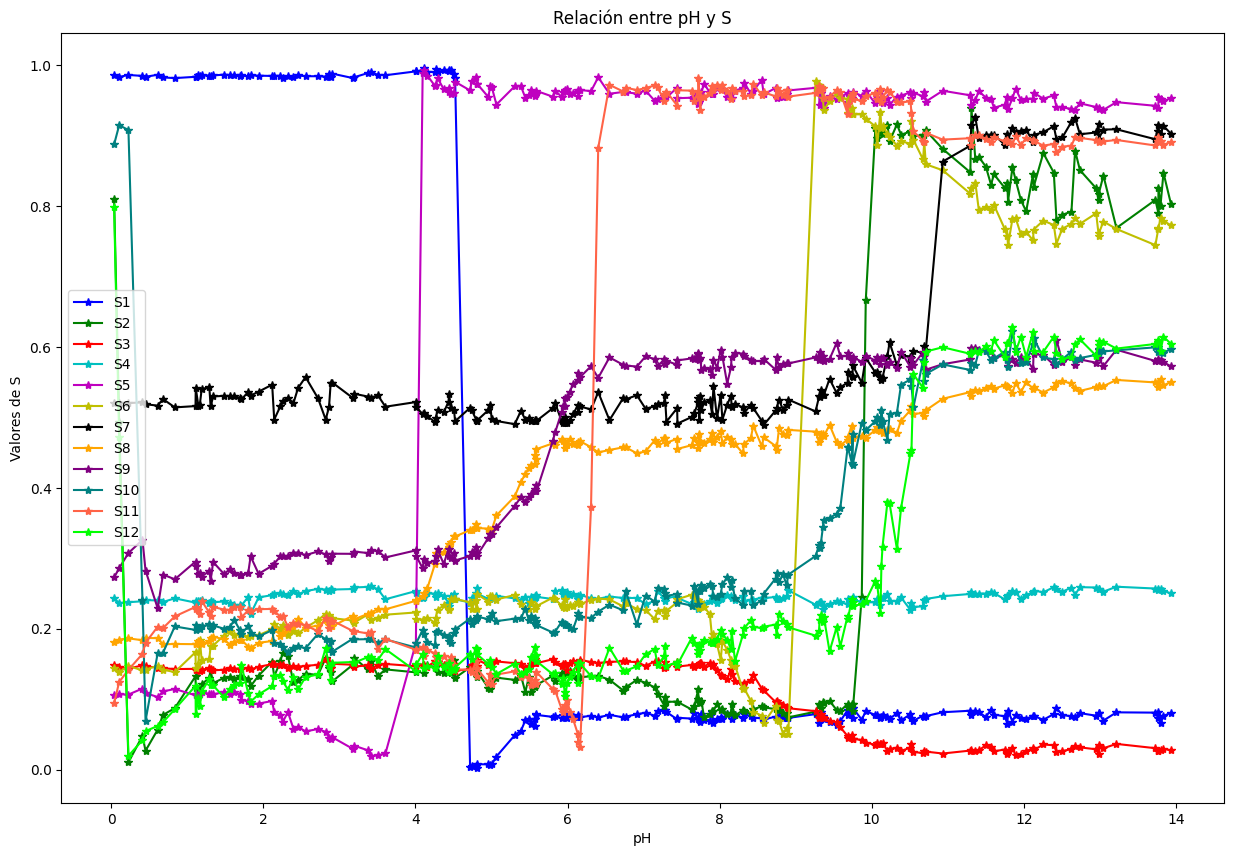

In [ ]:
pH = df['pH']
S1 = df['S1']
S2 = df['S2']
S3 = df['S3']
S4 = df['S4']
S5 = df['S5']
S6 = df['S6']
S7 = df['S7']
S8 = df['S8']
S9 = df['S9']
S10 = df['S10']
S11 = df['S11']
S12 = df['S12']
pH_ordenado = np.argsort(pH)

plt.figure(figsize=(15, 10))

colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#800080', '#008080', '#FF6347', 'lime']


plt.plot(pH[pH_ordenado], S1[pH_ordenado], '-*', color=colores[0], label='S1')
plt.plot(pH[pH_ordenado], S2[pH_ordenado], '-*', color=colores[1], label='S2')
plt.plot(pH[pH_ordenado], S3[pH_ordenado], '-*', color=colores[2], label='S3')
plt.plot(pH[pH_ordenado], S4[pH_ordenado], '-*', color=colores[3], label='S4')
plt.plot(pH[pH_ordenado], S5[pH_ordenado], '-*', color=colores[4], label='S5')
plt.plot(pH[pH_ordenado], S6[pH_ordenado], '-*', color=colores[5], label='S6')
plt.plot(pH[pH_ordenado], S7[pH_ordenado], '-*', color=colores[6], label='S7')
plt.plot(pH[pH_ordenado], S8[pH_ordenado], '-*', color=colores[7], label='S8')
plt.plot(pH[pH_ordenado], S9[pH_ordenado], '-*', color=colores[8], label='S9')
plt.plot(pH[pH_ordenado], S10[pH_ordenado], '-*', color=colores[9], label='S10')
plt.plot(pH[pH_ordenado], S11[pH_ordenado], '-*', color=colores[10], label='S11')
plt.plot(pH[pH_ordenado], S12[pH_ordenado], '-*', color=colores[11], label='S12')

plt.xlabel("pH")
plt.ylabel("Valores de S")
plt.title("Relación entre pH y S")
plt.legend()  # Muestra la leyenda con las etiquetas

plt.show()

Vemos que los datos en realidad están en general bastante diferenciados lo cual creo que es un indicio de que se podrá hacer una buena predicción pero sigamos viendo y tomando conclusiones, vamos a ver los gráficos boxplot o de cajas y bigotes.

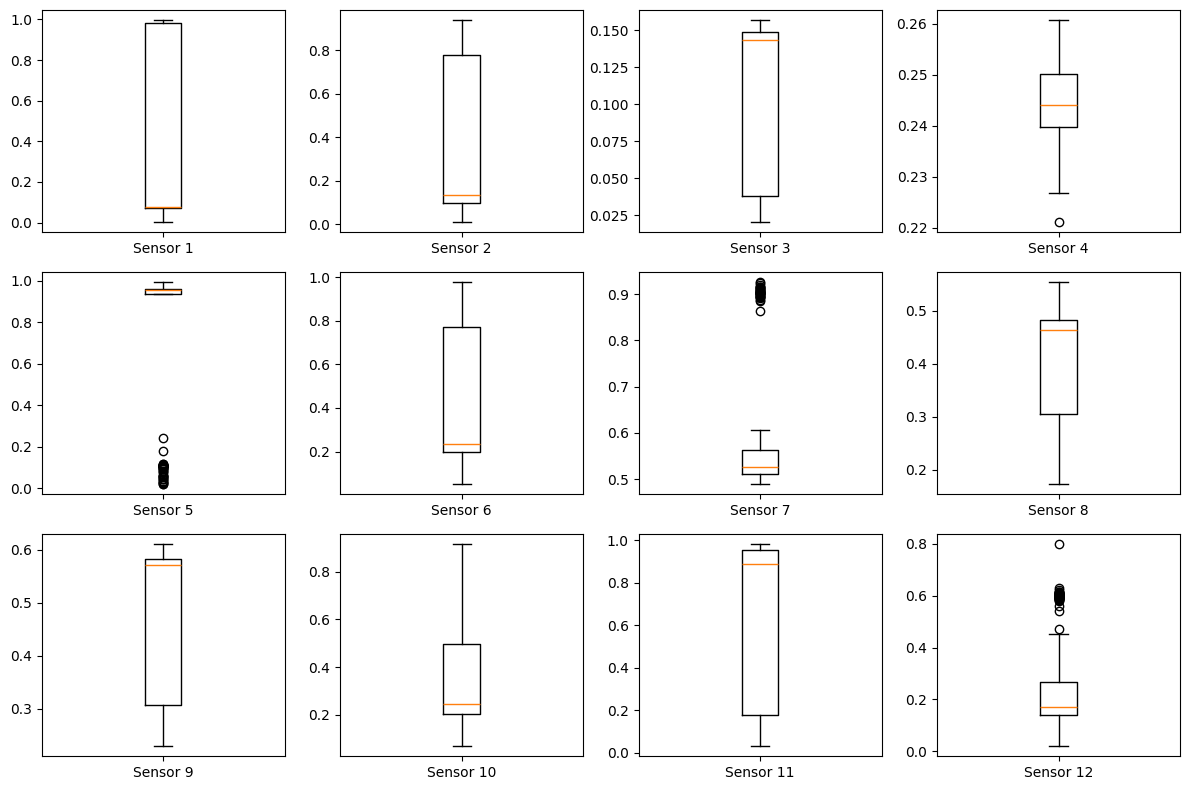

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes[0, 0].boxplot(S1, tick_labels=['Sensor 1'])
axes[0, 1].boxplot(S2, tick_labels=['Sensor 2'])
axes[0, 2].boxplot(S3, tick_labels=['Sensor 3'])
axes[0, 3].boxplot(S4, tick_labels=['Sensor 4'])
axes[1, 0].boxplot(S5, tick_labels=['Sensor 5'])
axes[1, 1].boxplot(S6, tick_labels=['Sensor 6'])
axes[1, 2].boxplot(S7, tick_labels=['Sensor 7'])
axes[1, 3].boxplot(S8, tick_labels=['Sensor 8'])
axes[2, 0].boxplot(S9, tick_labels=['Sensor 9'])
axes[2, 1].boxplot(S10, tick_labels=['Sensor 10'])
axes[2, 2].boxplot(S11, tick_labels=['Sensor 11'])
axes[2, 3].boxplot(S12, tick_labels=['Sensor 12'])

plt.tight_layout()
plt.show()

Claramente observamos que no hay datos nulos luego no es necesario realizar una reconstruccion de datos perdidos.

Podemos observar que hay ciertos pH que hace que se disparen diversos sensores, indicando que quiza esos sensores son buenos para predecir cuando se llega a ese pH.
Un ejemplo de ello es el S11 que en pH 6 se dispara su valor o el S9 que en pH 4 su valor también se dispara.
Luego el S8 por ejemplo también parece un buen sensor pues conforme el pH va aumentando este también aumenta gradualmente.

También tengamos en cuenta que parece que hay datos outliers pues por ejemplo al principio del gráfico se ve que S12 tiene un pico bastante raro, luego quiza sea conveniente tratar estos datos atipicos previo a entrenar el modelo quiza tratandolo como si fuesen datos perdidos y aproximarlos. Para finalizar comentar que a veces los boxplots son engañosos pues parece que el sensor 5 todos sus datos son outliers pero es que estos outliers son datos importantes y válidos en mi opinión, es decir que no por ser datos átipicos directamente son malos.

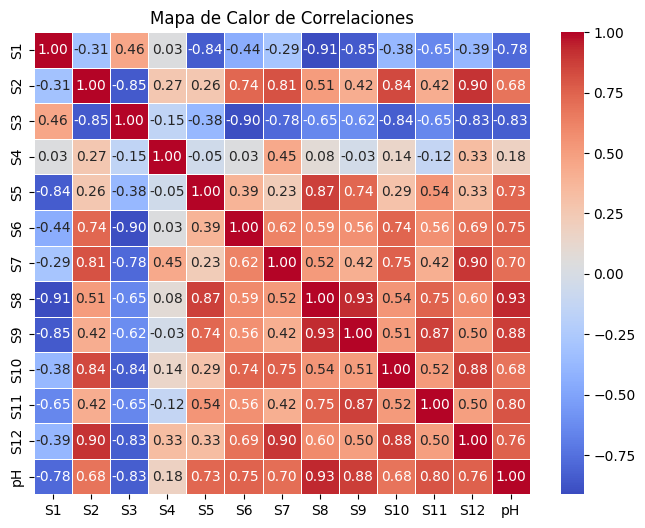

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df2.corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Vemos que hay bastante relación lineal entre varios sensores, esto nos indica que quizá renta deshacerse de cierta cantidad de sensores pues al tener gran relación los datos de algunos sensores serán deducible a partir de otros. De hecho el sensor 8 se ve que tiene muy buena relación con todos.

##Prueba de modelo sin tratar datos

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, cv=10, scoring='neg_mean_squared_error'):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Validación cruzada con múltiples métricas
    scoring_metrics = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'r2': 'r2'
    }
    validation_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=True
    )

    # Predicción en conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de regresión
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Resultados de regresión
    print("Resultados de Validación Cruzada (Regresión):")
    for metric in scoring_metrics:
        print(f" - {metric.capitalize()}:")
        print(f"   - Train: {np.mean(validation_results[f'train_{metric}']):.4f}")
        print(f"   - Test: {np.mean(validation_results[f'test_{metric}']):.4f}")

    print("\nResultados en Conjunto de Entrenamiento (Regresión):")
    print(f" - MSE: {train_mse:.4f}")
    print(f" - MAE: {train_mae:.4f}")
    print(f" - MAPE: {train_mape:.4f}")
    print(f" - R²: {train_r2:.4f}")

    print("\nResultados en Conjunto de Prueba (Regresión):")
    print(f" - MSE: {test_mse:.4f}")
    print(f" - MAE: {test_mae:.4f}")
    print(f" - MAPE: {test_mape:.4f}")
    print(f" - R²: {test_r2:.4f}")

    # Tiempos de entrenamiento y evaluación
    print("\nTiempos:")
    print(f" - Mean Training Time: {np.mean(validation_results['fit_time']):.4f} seconds")
    print(f" - Mean Scoring Time: {np.mean(validation_results['score_time']):.4f} seconds")

X=df2.select_dtypes(include=['number']).drop(columns=['pH'])
y=df2['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
##Sin ajustar hiperparametros
tree_reg = RandomForestRegressor()
train_and_evaluate_model(tree_reg, X_train, y_train, X_test, y_test,10)

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.0325
   - Test: -0.1364
 - Neg_mean_absolute_error:
   - Train: -0.1012
   - Test: -0.2388
 - R2:
   - Train: 0.9977
   - Test: 0.9911

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.0263
 - MAE: 0.0973
 - MAPE: 0.1890
 - R²: 0.9982

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.0934
 - MAE: 0.1832
 - MAPE: 0.0272
 - R²: 0.9923

Tiempos:
 - Mean Training Time: 0.1855 seconds
 - Mean Scoring Time: 0.0122 seconds


Vemos que sin tratar los datos tenemos unos resultados excelentes con un R² (Se explicará más adelante las métricas pero por ahora con saber que R² cercano a 1 es bueno es suficiente) casi igual a 1 y errores muy bajos a la hora de predecir (por debajo de las  2 decimas). Esto nos indica que nuestro objetivo no será como tal buscar ajustar los datos para realizar una buena predicción, pues eso ya lo tenemos, si no que será reducir la cantidad de datos y mantener una buena predicción.

##Preprocesamiento de datos

Primero realizaremos un tratamiento de los datos atípicos o outliers, pues como hemos observado hay ciertos sensores que tienen datos raros que podrían llegar a afectar muy negativamente cuando reduzcamos el número de sensores para esto usaremos el isolationForest

In [ ]:
# Detección de outliers usando Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42)
#contamination: Proporción esperada de outliers en los datos. Por defecto es "auto", pero puedes especificar un valor entre 0 y 1.
#random_state: Semilla para reproducibilidad.

outliers = iso_forest.fit_predict(df) # Entrena el modelo en df y devuelve un array con valores -1 para outliers y 1 para datos normales.

# Convertir outliers (-1) en valores NaN para que KNNImputer los impute
df.loc[outliers == -1] = np.nan

# Aplicar KNNImputer con los 2 vecinos más cercanos
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


print(df_imputed)

           S1        S2        S3        S4        S5        S6        S7  \
0    0.087840  0.082959  0.043743  0.240354  0.962288  0.930497  0.573987   
1    0.991412  0.138204  0.146882  0.253658  0.179650  0.223246  0.521936   
2    0.981929  0.148916  0.149017  0.256501  0.029655  0.211787  0.527765   
3    0.072656  0.114040  0.149145  0.228738  0.945559  0.240352  0.521567   
4    0.077545  0.896920  0.038023  0.242319  0.955601  0.886227  0.564030   
..        ...       ...       ...       ...       ...       ...       ...   
192  0.048954  0.127506  0.151243  0.243166  0.970230  0.248081  0.490562   
193  0.075856  0.096109  0.074989  0.228797  0.948961  0.954146  0.531963   
194  0.348940  0.228939  0.119611  0.244591  0.754731  0.360171  0.566223   
195  0.348940  0.228939  0.119611  0.244591  0.754731  0.360171  0.566223   
196  0.348940  0.228939  0.119611  0.244591  0.754731  0.360171  0.566223   

           S8        S9       S10       S11       S12         pH  
0    0.4

##**Iso_forest**
Es un algoritmo de detección de outliers basado en árboles de decisión (ya explicado en el otro ejercicio) . Su principio clave es que los outliers son más fáciles de aislar que los datos normales.

1 - Construcción de Árboles de Aislamiento:

Se crean múltiples árboles de aislamiento (Isolation Trees), donde cada nodo divide los datos aleatoriamente en base a una característica y un umbral aleatorio.
Los puntos que son outliers estarán más aislados, por lo que se necesitarán menos divisiones para separarlos.

2 - Cálculo de la Longitud del Camino:

Para cada punto, se mide la cantidad de divisiones necesarias hasta aislarlo en un nodo hoja.
Si un punto es aislado con pocas divisiones → es un outlier.
Si requiere muchas divisiones → es un punto normal.

3 - Asignación del Score de Anomalía:

Se calcula un score de anomalía (valor entre -1 y 1).
Un score más cercano a -1 indica un outlier más probable

Ventajas de IsolationForest:

-Eficiente: Escalable para grandes volúmenes de datos.

-No requiere asumir una distribución específica de los datos.

-Funciona en alta dimensión sin problemas de rendimiento.

-------


In [ ]:
# URL de la imagen
image_url = 'https://www.researchgate.net/publication/365288037/figure/fig1/AS:11431281096529655@1668174290997/Isolation-Forest-for-anomaly-detection.ppm'

# Crear y mostrar la imagen
Image(url=image_url)

##**KNNImputer(n_neighbors=n)**

- El KNNImputer es una técnica de imputación (relleno de valores faltantes) en machine learning que utiliza el algoritmo de K-Nearest Neighbors (KNN) para estimar los valores ausentes en un dataset, basándose en los valores de los "n vecinos más cercanos".

##¿Cómo funciona?

- Para cada dato faltante en una columna:

    - El algoritmo busca los n registros (vecinos) más similares (usando distancia euclidiana por defecto) que sí tengan valores en esa columna.

    - Calcula el valor a imputar como el promedio (o mediana, según configuración) de los valores de esos n vecinos.

In [ ]:
# URL de la imagen
image_url = 'https://miro.medium.com/v2/resize:fit:471/1*ptaJNTNgh3xAdoMWpEBKhw.png'

# Crear y mostrar la imagen
Image(url=image_url)

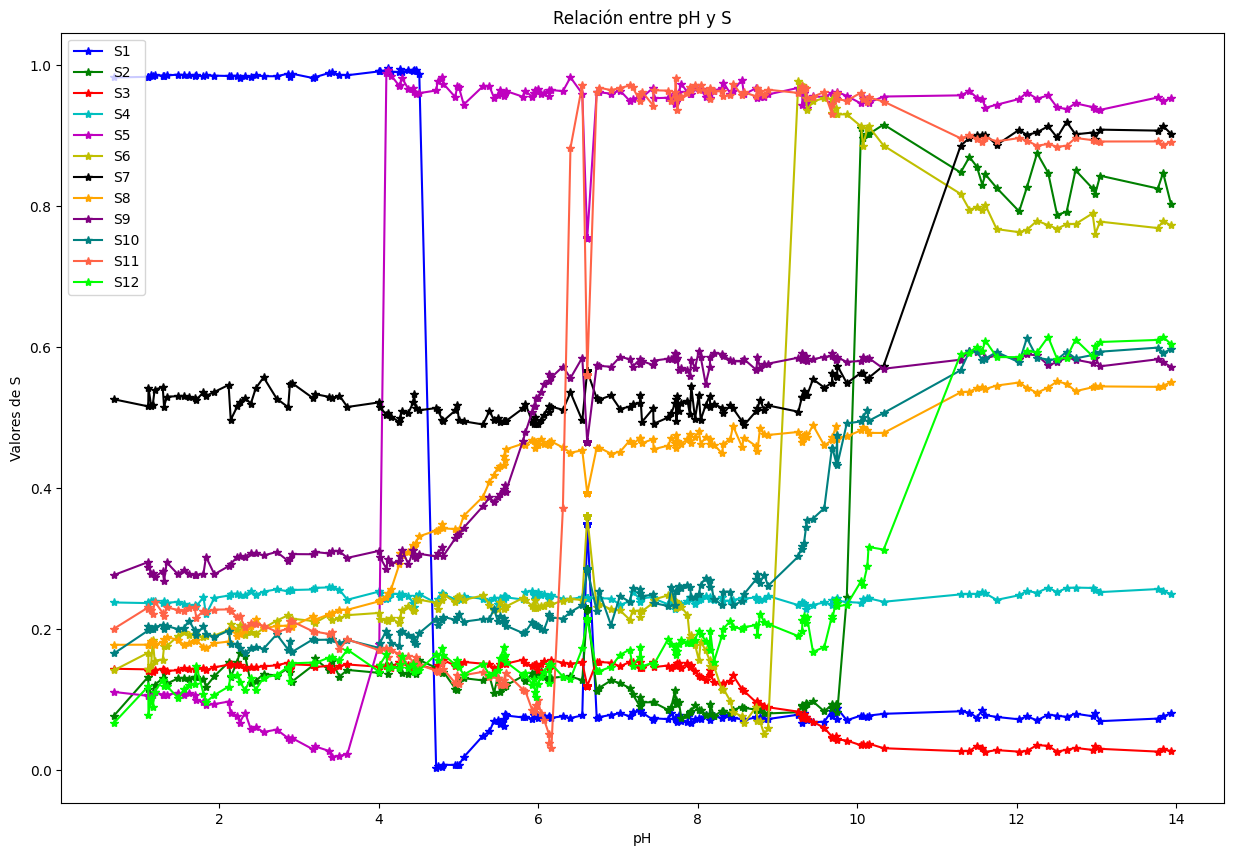

In [ ]:
pH = df_imputed['pH']
S1 = df_imputed['S1']
S2 = df_imputed['S2']
S3 = df_imputed['S3']
S4 = df_imputed['S4']
S5 = df_imputed['S5']
S6 = df_imputed['S6']
S7 = df_imputed['S7']
S8 = df_imputed['S8']
S9 = df_imputed['S9']
S10 = df_imputed['S10']
S11 = df_imputed['S11']
S12 = df_imputed['S12']
pH_ordenado = np.argsort(pH)

plt.figure(figsize=(15, 10))

colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#800080', '#008080', '#FF6347', 'lime']


plt.plot(pH[pH_ordenado], S1[pH_ordenado], '-*', color=colores[0], label='S1')
plt.plot(pH[pH_ordenado], S2[pH_ordenado], '-*', color=colores[1], label='S2')
plt.plot(pH[pH_ordenado], S3[pH_ordenado], '-*', color=colores[2], label='S3')
plt.plot(pH[pH_ordenado], S4[pH_ordenado], '-*', color=colores[3], label='S4')
plt.plot(pH[pH_ordenado], S5[pH_ordenado], '-*', color=colores[4], label='S5')
plt.plot(pH[pH_ordenado], S6[pH_ordenado], '-*', color=colores[5], label='S6')
plt.plot(pH[pH_ordenado], S7[pH_ordenado], '-*', color=colores[6], label='S7')
plt.plot(pH[pH_ordenado], S8[pH_ordenado], '-*', color=colores[7], label='S8')
plt.plot(pH[pH_ordenado], S9[pH_ordenado], '-*', color=colores[8], label='S9')
plt.plot(pH[pH_ordenado], S10[pH_ordenado], '-*', color=colores[9], label='S10')
plt.plot(pH[pH_ordenado], S11[pH_ordenado], '-*', color=colores[10], label='S11')
plt.plot(pH[pH_ordenado], S12[pH_ordenado], '-*', color=colores[11], label='S12')

plt.xlabel("pH")
plt.ylabel("Valores de S")
plt.title("Relación entre pH y S")
plt.legend()  # Muestra la leyenda con las etiquetas

plt.show()

Podemos ver que los outliers anteriores han disminuido en cantidad lo cual homogeiniza la muestra y posiblemente mejore la predicción.

Ahora buscaremos reducir el número de componentes para ello podemos hacerlo manualmente viendo correlaciones o usar SelectKbest con f_regression como función de puntuación, en este caso vere la matriz de correlaciones primero, llegare a una conclusión y usaré selectkbest para ver si era cierta.


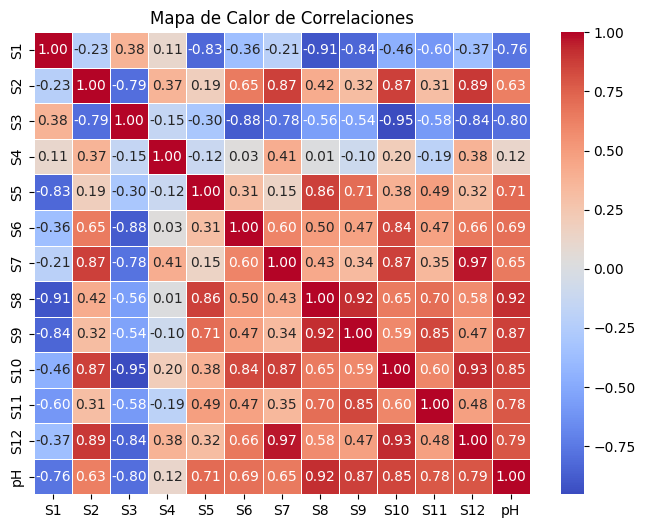

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_imputed.corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Vemos que el sensor 8 explica muy bien en general a todos los demás sensores así que puede ser interesante tomar este sensor si solo queremos quedarnos con uno (que será el caso porque a posteriori veremos sus grandes resultados), sin embargo no podemos asegurar el buen funcionamiento solo cogiendo uno pero hagamos la prueba y en caso de que no funcione bien, volveremos a hacer todo el proceso de con más sensores hasta obtener un resultado que se considere admisible para nuestro problema.

###SelectKBest

El selectKbest lo expliqué ya en el ejercicio anterior así que ahora solo explicare la métrica f_regression

####f_regression
Su objetivo es identificar qué variables (features) tienen una relación lineal estadísticamente significativa con la variable objetivo (target) mediante un test F.

#####Funcionamiento
- Calcula la correlación lineal entre cada feature y el target:

    - Usa la correlación de Pearson (coeficiente lineal).

    - Mide cómo varía el target cuando la feature cambia.

- Realiza un test F para cada feature:

    - Hipótesis nula (H₀): "La feature no tiene relación lineal con el target" (coeficiente = 0).

    - Estadístico F: Compara la varianza explicada por la feature vs. la varianza no explicada.

    - p-valor: Si es bajo (ej. < 0.05), se rechaza H₀ (la feature es relevante).

$$
F = \frac{\text{Varianza explicada por la feature}}{\text{Varianza no explicada (residual)}}
$$

    

- Ordena las features según su puntuación F (mayor F = mayor relevancia).

NOTA:

Score F alto + p-valor bajo → Feature muy relevante.

Score F bajo + p-valor alto → Feature poco útil (puede eliminarse)

In [ ]:
k_best = SelectKBest(score_func=f_regression, k=1)
X = df_imputed.select_dtypes(include=['number']).drop(columns=['pH'])
y = df_imputed['pH']
X_new = k_best.fit_transform(X,y)
print("--------------")

--------------


In [ ]:
# Obtener la máscara booleana de las características seleccionadas
selected_features_mask = k_best.get_support()

# Mostrar la máscara booleana
print("Máscara booleana de las características seleccionadas:", selected_features_mask)

Máscara booleana de las características seleccionadas: [False False False False False False False  True False False False False]


Escalamos datos por mismos motivos que antes,para mayor eficiencia a la hora de entrenar los modelos y predecir.

In [ ]:
X_not_scaled = X_new
se= StandardScaler()
X_scaled= se.fit_transform(X_not_scaled)

In [ ]:
y= df_imputed['pH']

##Definición del protocolo de validación experimental (entrenamiento,validación y test) junto con las métricas de evaluación del rendimiento

Aqui voy a usar la misma función que en el problema anterior pero adaptada al problema de regresión luego cambiarán las métricas con las que se evaluan el modelo. Voy a usar exactamente lo mismo que en el problema 1 en todo menos en metricas así que solo será necesario explicar las métricas. Bueno, también en vez de una matriz de confusión se mostrará una gráfica que mostrara la diferencia entre los datos reales del test y los datos predichos.
La línea roja discontinua representa la referencia ideal:

y_real=y_predicho

Si los puntos están alineados con esta línea, significa que el modelo está prediciendo con precisión.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, cv=10, scoring='neg_mean_squared_error'):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Validación cruzada con múltiples métricas
    scoring_metrics = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'r2': 'r2'
    }
    validation_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=True
    )

    # Predicción en conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de regresión
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Resultados de regresión
    print("Resultados de Validación Cruzada (Regresión):")
    for metric in scoring_metrics:
        print(f" - {metric.capitalize()}:")
        print(f"   - Train: {np.mean(validation_results[f'train_{metric}']):.4f}")
        print(f"   - Test: {np.mean(validation_results[f'test_{metric}']):.4f}")

    print("\nResultados en Conjunto de Entrenamiento (Regresión):")
    print(f" - MSE: {train_mse:.4f}")
    print(f" - MAE: {train_mae:.4f}")
    print(f" - MAPE: {train_mape:.4f}")
    print(f" - R²: {train_r2:.4f}")

    print("\nResultados en Conjunto de Prueba (Regresión):")
    print(f" - MSE: {test_mse:.4f}")
    print(f" - MAE: {test_mae:.4f}")
    print(f" - MAPE: {test_mape:.4f}")
    print(f" - R²: {test_r2:.4f}")

    # Tiempos de entrenamiento y evaluación
    print("\nTiempos:")
    print(f" - Mean Training Time: {np.mean(validation_results['fit_time']):.4f} seconds")
    print(f" - Mean Scoring Time: {np.mean(validation_results['score_time']):.4f} seconds")
    # Gráfico de comparación entre valores reales y predichos
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Predicciones')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea ideal')
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.title("Comparación de Valores Reales vs Predichos en test")
    plt.legend()
    plt.grid(True)
    plt.show()

###Métricas

**MAE(Mean Absolute Error o Error Absoluto Medio):**
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$
Es la diferencia media entre los valores reales y las predicciones. No penaliza los errores grandes tanto como otras métricas.

**MSE(Mean Squared Error o Error Cuadrático Medio):**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$
Promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. Penaliza más los errores grandes.

**MAPE(Mean Absolute Percentage Error o Error Porcentual Absoluto Medio):**
$$
\text{MAE} = \frac{100%}{n} \sum_{i=1}^{n} \left|( y_i - \hat{y}_i \right)/(yi)|
$$
Error relativo expresado como porcentaje. Útil para comparar modelos en diferentes escalas

**R²(R-Squared o  Coeficiente de Determinación):**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{\sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2}
$$

Proporción de la varianza de la variable dependiente explicada por el modelo.

    1: Explica toda la varianza.

    0: No explica nada (como predecir siempre la media)

    Negativo: Modelo peor que la media.

**neg_mean_squared_error** :

MSE pero negativo

- ¿Por qué se usa la versión negada?:

    - Scikit-learn optimiza para maximizar métricas. Como queremos minimizar el error, se niega el MSE

**neg_mean_absolute_error** :

MAE pero negativo por mismas razones

##Modelos Seleccionados

Los modelos seleccionados han sido el LinearRegression, el RandomForestRegression y el SVR

##LinearRegression
Es un algoritmo de regresión lineal que modela la relación entre una variable dependiente (target) y una o más variables independientes (features) mediante una combinación lineal de estas últimas. Es ampliamente utilizado en problemas de predicción numérica.

### **Funcionamiento**  

1. **Cálculo de la combinación lineal de características:**
  y = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b

   Donde:  
   - w_1, w_2,... w_n son los coeficientes (pendientes).  
   - x_1, x_2,... x_n  son las variables independientes (features).  
   - b es el intercepto o término de sesgo.

2. **Ajuste de los coeficientes:**  
   - Se minimiza el **error cuadrático medio (MSE)** (función de pérdida) con la fórmula de **mínimos cuadrados**:  
     w = (X^T X)^{-1} X^T y
   - Alternativamente, se puede usar **descenso de gradiente** para optimizar los parámetros.  

3. **Predicción:**  
   - Se usa la ecuación ajustada para estimar nuevos valores de y .  

4. **Evaluación del modelo:**  
   - Se mide la precisión con el **coeficiente de determinación R^2 **, que indica qué porcentaje de la variabilidad en  y explica el modelo.  

---

### **Ventajas**  
- **Fácil de interpretar:** Los coeficientes w indican la contribución de cada variable a la predicción.  
- **Eficiente y rápido:** Funciona bien con grandes volúmenes de datos.  
- **Escalable:** Puede manejar problemas con muchas variables independientes.  
- **Buena generalización:** Si las suposiciones se cumplen, evita el sobreajuste.  

---

### **Inconvenientes**  
- **Asume una relación lineal:** No funciona bien si la relación entre las variables no es lineal.  
- **Sensible a outliers:** Los valores atípicos pueden afectar fuertemente los coeficientes.  
- **Requiere independencia entre variables:** Si hay colinealidad alta, los coeficientes pueden ser inestables.  
- **Necesita escalado de datos:** Para mejorar el rendimiento, se recomienda normalizar las características antes de usarlo.  

---

**Conclusión:** LinearRegression es una opción potente y sencilla para problemas de regresión, pero requiere cumplir ciertas suposiciones para obtener buenos resultados (podremos ver que no obtiene los mejores resultados pero no es del todo malo para este caso).

##RandomForestRegression
Es un algoritmo de regresión basado en el aprendizaje conjunto (ensemble learning) que utiliza múltiples árboles de decisión (ya explicado previamente) para predecir valores continuos. Es una extensión del algoritmo RandomForest para problemas de regresión, donde cada árbol en el bosque contribuye a la predicción final, que es el promedio de las predicciones de todos los árboles.

---

###Funcionamiento
1.**Construcción de árboles de decisión:**

Se crean múltiples árboles de decisión utilizando subconjuntos aleatorios de los datos de entrenamiento (muestreo con reemplazo, conocido como bagging).

En cada división de un árbol, se selecciona un subconjunto aleatorio de características para evaluar la mejor división.

2.**Predicción:**

Cada árbol en el bosque realiza una predicción independiente.

La predicción final es el promedio de las predicciones de todos los árboles.

3.**Reducción de la varianza:**

Al combinar múltiples árboles, se reduce el riesgo de sobreajuste y se mejora la generalización del modelo.

---


###Ventajas
- **Precisión alta**: Suele ofrecer un rendimiento superior en comparación con modelos más simples como la regresión lineal.

- **Robusto frente al sobreajuste**: Debido al uso de múltiples árboles y la aleatorización en la selección de características y muestras.

- **Manejo de datos no lineales**: Puede capturar relaciones no lineales entre las características y la variable objetivo.

- **No requiere normalización**: No es necesario escalar o normalizar las características antes de entrenar el modelo.

- **Interpretabilidad parcial**: Aunque no es tan interpretable como un solo árbol de decisión, se puede acceder a la importancia de las características.

---


###Inconvenientes
- **Coste computacional**: El entrenamiento de múltiples árboles puede ser lento y consumir mucha memoria, especialmente con conjuntos de datos grandes.

- **Menos interpretable que un solo árbol**: Aunque se puede acceder a la importancia de las características, el modelo en sí es más complejo que un solo árbol.

- **Sensibilidad a datos ruidosos**: Puede verse afectado por datos ruidosos o outliers, ya que los árboles tienden a ajustarse a estos valores.

- **Hiperparámetros a ajustar**: Requiere la configuración de varios hiperparámetros, como el número de árboles (n_estimators), la profundidad máxima de los árboles (max_depth), y el número mínimo de muestras por hoja (min_samples_leaf).

##SVR (Support Vector Regression)
Es una extensión del algoritmo Support Vector Machine (SVM) para problemas de regresión. En lugar de clasificar datos, el SVR se utiliza para predecir valores continuos. Al igual que SVC busca encontrar un hiperplano que mejor se ajuste a los datos, pero en este caso, el objetivo es minimizar el error de predicción dentro de un margen de tolerancia.

-----

###Funcionamiento
1-**Hiperplano de regresión:**

SVR intenta encontrar un hiperplano que mejor se ajuste a los datos, minimizando el error de predicción.

Se define un margen de tolerancia (ε) alrededor del hiperplano, dentro del cual los errores no se penalizan.

2.**Función de pérdida:**

Se utiliza la función de pérdida ε-insensible, que ignora los errores menores que ε.

$$
L_\epsilon(y_i, \hat{y}_i) =
\begin{cases}
0 & \text{si } |y_i - \hat{y}_i| \leq \epsilon \\
|y_i - \hat{y}_i| - \epsilon & \text{si } |y_i - \hat{y}_i| > \epsilon
\end{cases}
$$

**3. Función objetivo completa**

El objetivo del SVR es minimizar la siguiente función, que combina:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N L_\epsilon(y_i + \hat{y}_i)
$$

- Pérdida ε-insensitive (controla los errores).

- Término de regularización (controla la complejidad del modelo, evitando overfitting)

Para problemas no linealmente separables, se introducen variables de holgura (slack variables) que permiten flexibilidad introduciendo restricciones:

$$
\min_{\mathbf{w}, b,\xi,\xi^*} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N (\xi_i + \xi_i^*)
$$

**4. Restricciones**


$$
\begin{cases}
y_i - \mathbf{w}^T \phi(\mathbf{x}_i) - b \leq \epsilon + \xi_i \\
\mathbf{w}^T \phi(\mathbf{x}_i) + b - y_i \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0 \quad \forall i
\end{cases}
$$

**Variables**:
- $y_i$: Valor real
- $\hat{y}_i$: Predicción
- $\epsilon$: Margen de tolerancia
- $C$: Parámetro de regularización
- $\mathbf{w}$: Vector de pesos
- $b$: Término de sesgo
- $\xi_i, \xi_i^*$: Variables de holgura
- $\phi(\mathbf{x})$: Función de mapeo a espacio de características
- $K(\mathbf{x}_i, \mathbf{x})$: Función kernel (ej: RBF)
- $\alpha_i, \alpha_i^*$: Coeficientes del modelo

Los errores fuera de este margen se penalizan linealmente.

3.**Optimización:**

El problema se formula como un problema de optimización convexa, donde se minimiza la norma del vector de pesos (w) sujeto a las restricciones de la función de pérdida.

Se utiliza el método de máximos márgenes para garantizar la generalización del modelo.

4.**Kernel trick:**

Al igual que en SVC puede utilizar funciones kernel (como lineal, polinómico o RBF) para mapear los datos a un espacio de mayor dimensionalidad, donde un hiperplano lineal puede separar los datos de manera efectiva.

-----

###Ventajas

- **Efectivo en espacios de alta dimensionalidad**: Funciona bien incluso cuando el número de características es mayor que el número de muestras.

- **Flexibilidad con kernels**: Puede modelar relaciones no lineales utilizando kernels como RBF, polinómico o sigmoide.

- **Control del margen de tolerancia**: El parámetro ε permite controlar la sensibilidad del modelo a los errores.

- **Robusto frente al sobreajuste**: Especialmente cuando se utiliza regularización (parámetro C).

-----

###Inconvenientes

- **Coste computacional**: Puede ser lento en conjuntos de datos grandes debido a la complejidad del problema de optimización.

- **Sensibilidad a los hiperparámetros**: El rendimiento depende en gran medida de la elección de los hiperparámetros (C, ε, kernel y sus parámetros).

- **Dificultad de interpretación**: A diferencia de modelos lineales, SVR con kernels no lineales no es fácil de interpretar.

- **Requiere normalización de datos**: Es recomendable escalar las características antes de entrenar el modelo, ya que SVR es sensible a la escala de los datos.

##Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar)

Los hiperparámetros son parámetros que no se aprenden directamente de los datos, sino que deben establecerse antes del proceso de entrenamiento de un modelo. Estos afectan el rendimiento y la capacidad de generalización del modelo.

Los hiperparámetros se utilizan para:

-Controlar la complejidad del modelo: Evitar sobreajuste (overfitting) o subajuste (underfitting).
    
-Optimizar el desempeño del modelo: Ajustar hiperparámetros permite mejorar métricas como precisión, recall o F1-score.
    
-Acelerar el proceso de entrenamiento: Algunos hiperparámetros impactan el tiempo y el uso de recursos computacionales.

Su propósito es encontrar la mejor configuración posible para un modelo.

En este caso para buscar los valores de los hiperparámetros voy a utilizar RandomizedSearchCV  que es una técnica de optimización de hiperparámetros que selecciona combinaciones aleatorias de hiperparámetros para entrenar y evaluar un modelo.

In [ ]:
lin_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

#fit intercept =  Indica si se debe calcular la intersección (intercept) en el modelo de regresión lineal.
## Si es True, el modelo ajustará una intersección (es decir, la línea de regresión no necesariamente pasará por el origen).
## Si es False, se asume que los datos ya están centrados y no se calculará la intersección.

#copy_X = indica si se debe copiar la matriz de características X antes de realizar el ajuste.
## Si es True, se crea una copia de X para evitar modificar los datos originales.
## Si es False, se trabaja directamente con la matriz X original, lo que puede ahorrar memoria pero modificar los datos originales.

#n_jobs = Controla el número de trabajos (jobs) que se ejecutan en paralelo durante el ajuste del modelo.
##None significa que se usa un solo trabajo, mientras que -1 utiliza todos los procesadores disponibles para acelerar el proceso.

#positive = Si es True, fuerza a que los coeficientes de la regresión sean positivos.
##Esto es útil cuando se sabe que la relación entre las variables independientes y la dependiente es positiva.

skf = KFold(n_splits=10) #Explicado anteriormente

random_search = RandomizedSearchCV(LinearRegression(), lin_params, cv=skf, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_lin_params = random_search.best_params_

print("Mejores hiperparámetros para LinearRegression:", best_lin_params)

Mejores hiperparámetros para LinearRegression: {'positive': True, 'n_jobs': None, 'fit_intercept': True, 'copy_X': True}


In [ ]:
rfr_params = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
# n_estimators = Número de árboles en el bosque.
## Un valor más alto generalmente mejora el rendimiento del modelo, ya que se promedian más predicciones, pero también aumenta el tiempo de entrenamiento y el uso de recursos.
## Por ejemplo, n_estimators=100 significa que se construirán 100 árboles de decisión.

# max_depth = Profundidad máxima de cada árbol en el bosque.
## Si es None, los árboles crecerán hasta que todas las hojas sean puras o hasta que se alcance el valor de min_samples_split.
## Un valor más bajo (por ejemplo, max_depth=10) limita la profundidad del árbol, lo que puede evitar el sobreajuste (overfitting)
##, pero también puede subajustar (underfit) el modelo si es demasiado restrictivo.

# min_samples_split = Número mínimo de muestras requeridas para dividir un nodo interno en el árbol.
## Por ejemplo, si min_samples_split=5, un nodo solo se dividirá si contiene al menos 5 muestras.
## Un valor más alto puede evitar que el modelo aprenda patrones muy específicos (ruido) y, por lo tanto, reducir el sobreajuste.

# min_samples_leaf = Número mínimo de muestras que debe tener una hoja (nodo final) en el árbol.
## Por ejemplo, si min_samples_leaf=2, cada hoja debe contener al menos 2 muestras.
## Un valor más alto puede suavizar el modelo y reducir el sobreajuste, pero también puede llevar a un subajuste si es demasiado restrictivo.

# max_features = Número máximo de características que se consideran para dividir un nodo en el árbol.
## 'sqrt' usa la raíz cuadrada del número total de características.
## 'log2' usa el logaritmo en base 2 del número total de características.
## Este hiperparámetro ayuda a controlar la aleatoriedad y la diversidad de los árboles en el bosque.
##Un valor más bajo puede reducir el sobreajuste, pero también puede limitar la capacidad del modelo para aprender patrones complejos.
skf = KFold(n_splits=10)
random_search = RandomizedSearchCV(RandomForestRegressor(), rfr_params, cv=skf, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_rfr_params = random_search.best_params_
print("Mejores hiperparámetros para DecisionTree:", best_rfr_params)

Mejores hiperparámetros para DecisionTree: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}


In [ ]:
svr_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],  # Solo relevante para 'poly'
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
}

# C = Parámetro de regularización.
## Controla el trade-off entre maximizar el margen (evitar el sobreajuste) y minimizar el error de entrenamiento.
## Un valor más alto de C permite menos errores en el entrenamiento, pero puede llevar a un sobreajuste.
## Un valor más bajo de C permite un margen más amplio, lo que puede generalizar mejor, pero con más errores en el entrenamiento.

# kernel = Tipo de kernel utilizado en el modelo.
## 'linear': Usa un kernel lineal (útil para datos linealmente separables).
## 'poly': Usa un kernel polinomial (captura relaciones no lineales mediante polinomios).
## 'rbf': Usa un kernel de función de base radial (RBF, el más común para problemas no lineales). Se explica previamente rbf
## 'sigmoid': Usa un kernel sigmoide (similar a una red neuronal).

# degree = Grado del polinomio para el kernel 'poly'.
## Solo es relevante si el kernel es 'poly'.
## Define el grado del polinomio utilizado para modelar la relación entre las características.
## Por ejemplo, degree=2 usa un polinomio de segundo grado (cuadrático).

# gamma = Coeficiente del kernel para 'rbf', 'poly' y 'sigmoid'.
## 'scale': Calcula gamma como 1 / (n_features * X.var()), es decir, basado en la escala de los datos.
## 'auto': Usa 1 / n_features, lo que puede no ser óptimo para datos con alta varianza.
## Un valor más alto de gamma hace que el modelo sea más sensible a los puntos cercanos, lo que puede llevar a un sobreajuste.
## Un valor más bajo de gamma hace que el modelo sea más suave y generalice mejor.

# epsilon = Define el margen de tolerancia en la regresión.
## Controla el ancho del "tubo" alrededor de la función de predicción dentro del cual no se penalizan los errores.
## Un valor más pequeño de epsilon hace que el modelo sea más estricto, ajustándose más a los datos de entrenamiento.
## Un valor más grande de epsilon permite más errores, lo que puede mejorar la generalización.

skf = KFold(n_splits=10)
random_search = RandomizedSearchCV(SVR(), svr_params, cv=skf, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42) # Use lr_params instead of rf_params
random_search.fit(X_train, y_train)
best_svr_params = random_search.best_params_
print("Mejores hiperparámetros para SVR:", best_svr_params)

Mejores hiperparámetros para SVR: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'degree': 4, 'C': 100}


##K-Fold Cross Validation
Realmente se explica previamente pero haré un pequeño recordatorio pues no es largo de explicar:

Es una técnica de validación cruzada usada para evaluar el rendimiento de un modelo de machine learning dividiendo los datos en múltiples subconjuntos (folds).

Se divide el dataset en K partes (folds) de tamaño similar.
Para cada iteración:
- Se usa K-1 folds para entrenar el modelo.

- El fold restante se usa para validar el modelo.

- Se repite este proceso K veces, alternando el fold de validación.

- Se calcula el promedio de las métricas obtenidas en cada iteración.

##Entrenamiento y estimación del error fuera de la muestra.Discusión de resultados y extracción de conclusiones

Como en el ejercicio anterior voy a ver primero sin usar los hiperparámetros calculados y despues usandolos.

Veamos el modelo LinearRegression.

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -1.4171
   - Test: -1.4650
 - Neg_mean_absolute_error:
   - Train: -0.8639
   - Test: -0.8776
 - R2:
   - Train: 0.8319
   - Test: 0.7986

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 1.4196
 - MAE: 0.8649
 - MAPE: 0.1558
 - R²: 0.8318

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 1.4231
 - MAE: 0.8408
 - MAPE: 0.1199
 - R²: 0.8529

Tiempos:
 - Mean Training Time: 0.0015 seconds
 - Mean Scoring Time: 0.0022 seconds


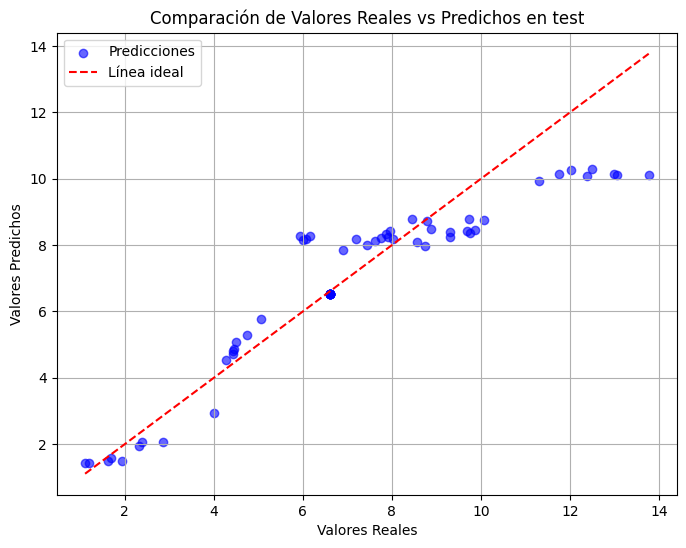

In [ ]:
##Sin ajustar hiperparametros
linear_model = LinearRegression()

train_and_evaluate_model(linear_model, X_train, y_train, X_test, y_test,10)

Podemos ver que explica un 85 por ciento de la varianza de los datos usando solo un sensor lo cual es un buen porcentaje pero no suficiente comparandolo con modelos posteriores, veamos usando hiperparámetros.

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -1.4171
   - Test: -1.4650
 - Neg_mean_absolute_error:
   - Train: -0.8639
   - Test: -0.8776
 - R2:
   - Train: 0.8319
   - Test: 0.7986

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 1.4196
 - MAE: 0.8649
 - MAPE: 0.1558
 - R²: 0.8318

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 1.4231
 - MAE: 0.8408
 - MAPE: 0.1199
 - R²: 0.8529

Tiempos:
 - Mean Training Time: 0.0019 seconds
 - Mean Scoring Time: 0.0027 seconds


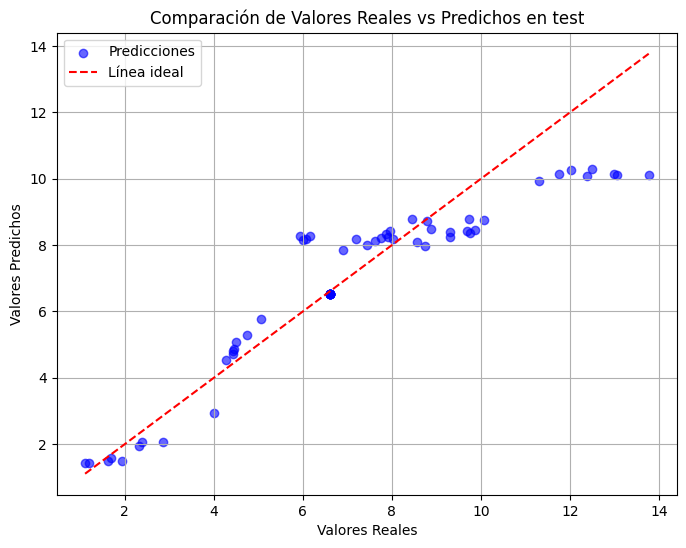

In [ ]:
linear_model = LinearRegression(fit_intercept=best_lin_params['fit_intercept'],copy_X = best_lin_params['copy_X'],n_jobs=best_lin_params['n_jobs'],positive=best_lin_params['positive'])

train_and_evaluate_model(linear_model, X_train, y_train, X_test, y_test,10)

Se ve que realmente no hay una mejora ajustando hiperparámetros en este modelo

Veamos el modelo de RandomForestRegressor.

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.1018
   - Test: -0.8944
 - Neg_mean_absolute_error:
   - Train: -0.2015
   - Test: -0.5972
 - R2:
   - Train: 0.9879
   - Test: 0.8787

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.1085
 - MAE: 0.2062
 - MAPE: 0.0390
 - R²: 0.9871

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.7612
 - MAE: 0.6060
 - MAPE: 0.0846
 - R²: 0.9213

Tiempos:
 - Mean Training Time: 0.1655 seconds
 - Mean Scoring Time: 0.0156 seconds


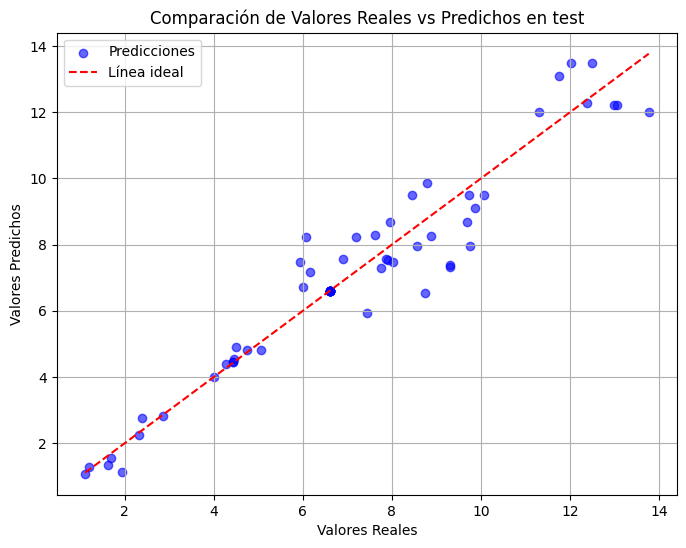

In [ ]:
##Sin ajustar hiperparametros
tree_reg = RandomForestRegressor()
train_and_evaluate_model(tree_reg, X_train, y_train, X_test, y_test,10)

Vemos que explica un 91 por ciento de los datos lo cual para usar solo 1 de 12 sensores es un gran resultado, veamos ajustando hiperparámetros

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.3592
   - Test: -0.6621
 - Neg_mean_absolute_error:
   - Train: -0.3932
   - Test: -0.5477
 - R2:
   - Train: 0.9574
   - Test: 0.9110

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.3578
 - MAE: 0.3881
 - MAPE: 0.0755
 - R²: 0.9576

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.6509
 - MAE: 0.5398
 - MAPE: 0.0819
 - R²: 0.9327

Tiempos:
 - Mean Training Time: 0.3524 seconds
 - Mean Scoring Time: 0.0269 seconds


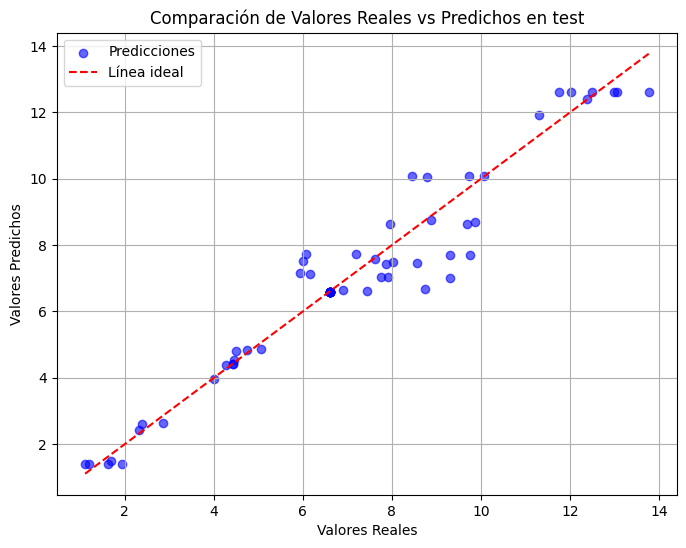

In [ ]:

tree_reg = RandomForestRegressor(n_estimators=best_rfr_params['n_estimators'],max_depth=best_rfr_params['max_depth'],min_samples_split=best_rfr_params['min_samples_split'],min_samples_leaf=best_rfr_params['min_samples_leaf'],max_features=best_rfr_params['max_features'],random_state=42)
train_and_evaluate_model(tree_reg, X_train, y_train, X_test, y_test,10)

Vemos que llega al 93 por ciento de varianza de explicada lo cual esta extremadamente bien para usar un único sensor.

Veamos finalmente el modelo SVR

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.8336
   - Test: -0.9659
 - Neg_mean_absolute_error:
   - Train: -0.6740
   - Test: -0.7383
 - R2:
   - Train: 0.9011
   - Test: 0.8663

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.8219
 - MAE: 0.6683
 - MAPE: 0.1425
 - R²: 0.9026

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.8094
 - MAE: 0.6666
 - MAPE: 0.1195
 - R²: 0.9164

Tiempos:
 - Mean Training Time: 0.0020 seconds
 - Mean Scoring Time: 0.0021 seconds


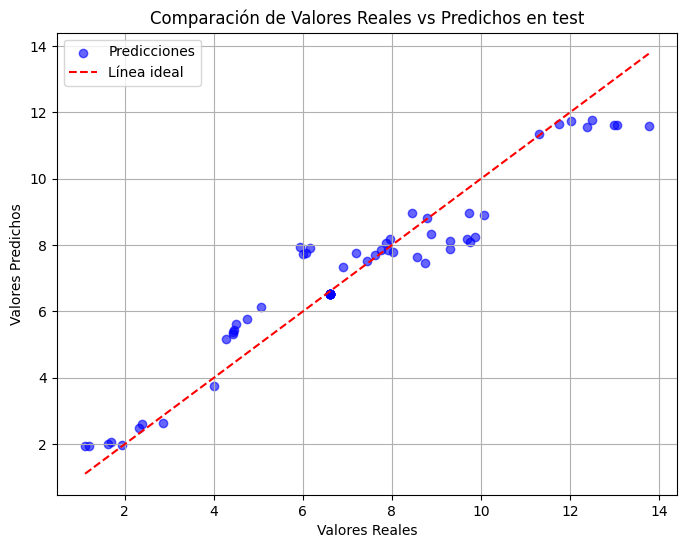

In [ ]:
##Sin ajustar hiperparámetros
svr_reg = SVR()  # You can experiment with different kernels
train_and_evaluate_model(svr_reg, X_train, y_train, X_test, y_test,10)

Tenemos como en el modelo anterior un gran resultado explicando un 91 por ciento pero también tiene mayor MSE. Veamos ajustando hiperparámetros.

Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.5473
   - Test: -0.6944
 - Neg_mean_absolute_error:
   - Train: -0.5220
   - Test: -0.6109
 - R2:
   - Train: 0.9351
   - Test: 0.9047

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.5530
 - MAE: 0.5271
 - MAPE: 0.0989
 - R²: 0.9345

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.6741
 - MAE: 0.5727
 - MAPE: 0.0830
 - R²: 0.9303

Tiempos:
 - Mean Training Time: 0.0041 seconds
 - Mean Scoring Time: 0.0020 seconds


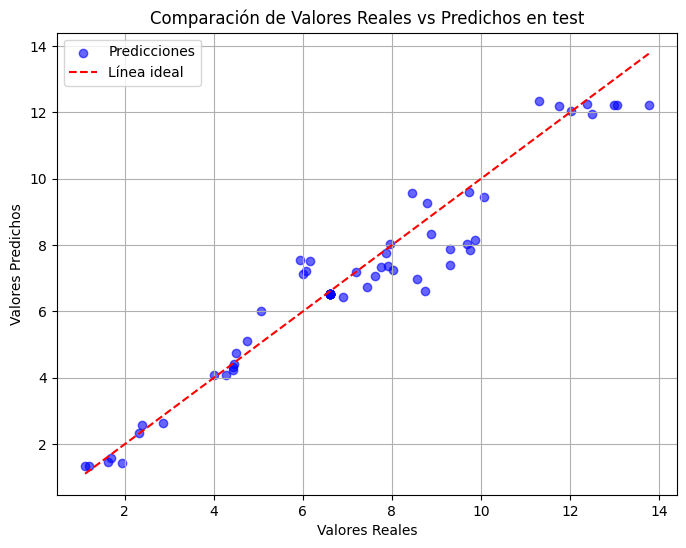

In [ ]:
   # Create an SVR object
svr_reg = SVR(C=best_svr_params['C'],degree=best_svr_params['degree'],gamma=best_svr_params['gamma'],epsilon=best_svr_params['epsilon'],kernel=best_svr_params['kernel'])  # You can experiment with different kernels
train_and_evaluate_model(svr_reg, X_train, y_train, X_test, y_test,10)

Vemos que como el RFR da también resultados buenos y parecidos.

Veamos cogiendo más datos (voy a realizar todo el proceso) otra vez en esta celda pero ahora seleccionado mas elementos y usaré RFR pues hemos visto su buen comportamiento, tras esto lo que veremos es que disminuye el error conforme vas aumentando sensores

--------------
Máscara booleana de las características seleccionadas: [False False  True False False False False  True  True  True False False]
Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.0163
   - Test: -0.1148
 - Neg_mean_absolute_error:
   - Train: -0.0810
   - Test: -0.2179
 - R2:
   - Train: 0.9981
   - Test: 0.9854

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.0157
 - MAE: 0.0802
 - MAPE: 0.0218
 - R²: 0.9981

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.1066
 - MAE: 0.2110
 - MAPE: 0.0409
 - R²: 0.9890

Tiempos:
 - Mean Training Time: 0.1384 seconds
 - Mean Scoring Time: 0.0110 seconds


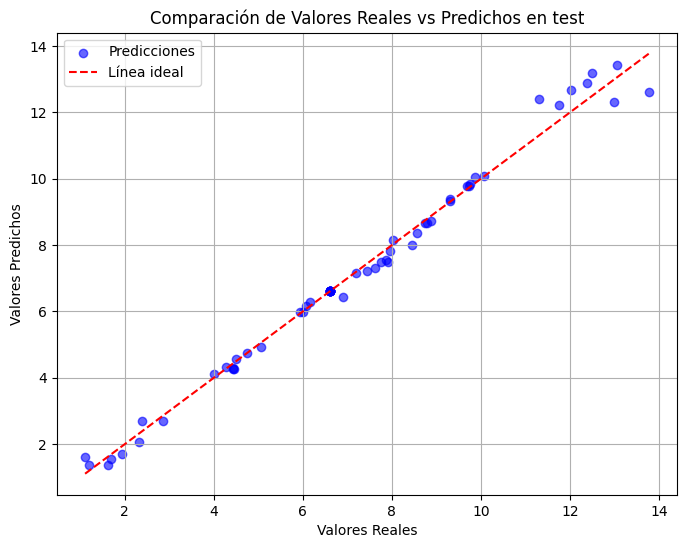

In [ ]:
X=df2.select_dtypes(include=['number']).drop(columns=['pH'])
k_best = SelectKBest(score_func=f_regression, k=4)
X = df_imputed.select_dtypes(include=['number']).drop(columns=['pH'])
y = df_imputed['pH']
X_new = k_best.fit_transform(X,y)
print("--------------")
# Obtener la máscara booleana de las características seleccionadas
selected_features_mask = k_best.get_support()

# Mostrar la máscara booleana
print("Máscara booleana de las características seleccionadas:", selected_features_mask)
X_not_scaled = X_new
se= StandardScaler()
X_scaled= se.fit_transform(X_not_scaled)
y= df_imputed['pH']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)
##Sin ajustar hiperparametros
tree_reg = RandomForestRegressor()
train_and_evaluate_model(tree_reg, X_train, y_train, X_test, y_test,10)

--------------
Máscara booleana de las características seleccionadas: [False False  True False False False False  True  True  True  True  True]
Resultados de Validación Cruzada (Regresión):
 - Neg_mean_squared_error:
   - Train: -0.0147
   - Test: -0.1079
 - Neg_mean_absolute_error:
   - Train: -0.0720
   - Test: -0.2046
 - R2:
   - Train: 0.9983
   - Test: 0.9868

Resultados en Conjunto de Entrenamiento (Regresión):
 - MSE: 0.0138
 - MAE: 0.0670
 - MAPE: 0.0179
 - R²: 0.9984

Resultados en Conjunto de Prueba (Regresión):
 - MSE: 0.0888
 - MAE: 0.1777
 - MAPE: 0.0358
 - R²: 0.9908

Tiempos:
 - Mean Training Time: 0.1407 seconds
 - Mean Scoring Time: 0.0118 seconds


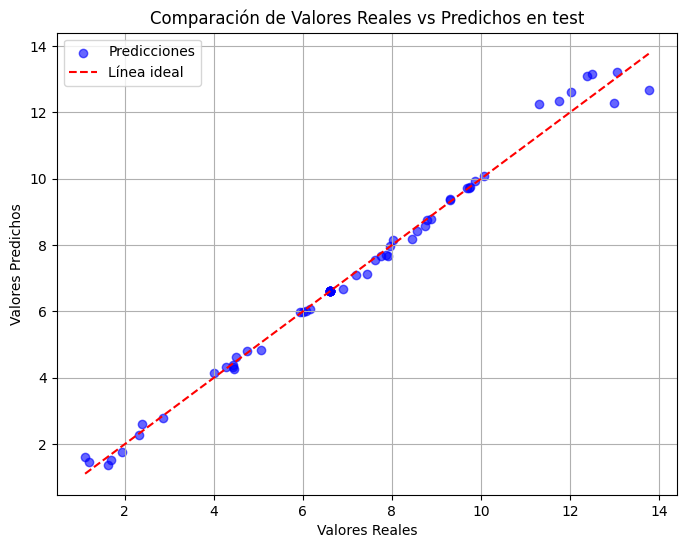

In [ ]:
X=df2.select_dtypes(include=['number']).drop(columns=['pH'])
k_best = SelectKBest(score_func=f_regression, k=6)
X = df_imputed.select_dtypes(include=['number']).drop(columns=['pH'])
y = df_imputed['pH']
X_new = k_best.fit_transform(X,y)
print("--------------")
# Obtener la máscara booleana de las características seleccionadas
selected_features_mask = k_best.get_support()

# Mostrar la máscara booleana
print("Máscara booleana de las características seleccionadas:", selected_features_mask)
X_not_scaled = X_new
se= StandardScaler()
X_scaled= se.fit_transform(X_not_scaled)
y= df_imputed['pH']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)
##Sin ajustar hiperparametros
tree_reg = RandomForestRegressor()
train_and_evaluate_model(tree_reg, X_train, y_train, X_test, y_test,10)

###Conclusiones
De los resultados vemos que solo con un sensor obtenemos muy buenos resultados de predicción con el modelo SVR o RFR luego lo más rentable a la hora de automatizar este proceso y lo más interesante es entrenar un modelo con únicamente con los datos del sensor S8 que es el que mejor resultados nos da. También notar que considero en general que un error de 0.5 más o menos en ph considero que no es excesivamente grande por eso le he dado más importancia al coeficiente de determinación que al MAE por ejemplo. Si se quisiese mayor porcentaje de acierto con mayor coeficiente de determinación y menos MAE,MSE y MAPE simplemente nos podríamos quedar con más sensores como en el último ejemplo que tomando 4 sensores (S3,S8,S9,S10) nos da una varianza explicada muy alta también pero además se nos reduce significativamente los otros errores (en general por debajo de 0.2).En resumen según las preferencias económicas y de precisión se podrá optar por tomar mayor número de sensores (todos) y obtener una predicción muy buena, tomar un número reducido de sensores por ejemplo 4 que daría una predicción decente gastanto un cuarto de lo que cuesta con todos los sensores, o el más extremo que también es el que más se ha explorado durante la práctica que es tomando un único sensor el cual nos da una predicción decente sacrificando un poco tener mayores errores medios pero ahorrando en gran cantidad economicamente.